# Load The Libraries

# Final Project - Bandora Peer To Peer Lending

# Load the Libraries

# Data Interpretation

In [8]:
import pandas as pd # data processing
import numpy as np  # linear algebra
import matplotlib.pyplot as plt #ploting libraries
%matplotlib inline
import seaborn as sns #ploting libraries
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from pca import pca
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',200)

#  Data Preprocessing

In [9]:

data1= pd.read_csv("C:/Users/hp/Downloads/Bondora_raw (1).zip", low_memory=False)

In [10]:
#This line of code returns the shape of the DataFrame
data1.shape

(134529, 112)

In [11]:
# This line code explore the first 5 rows
data1.head()

ReportAsOfEOD                                LoanId  LoanNumber  \
0    2020-01-27  F0660C80-83F3-4A97-8DA0-9C250112D6EC         659   
1    2020-01-27  978BB85B-1C69-4D51-8447-9C240104A3A2         654   
2    2020-01-27  EA44027E-7FA7-4BB2-846D-9C1F013C8A22         641   
3    2020-01-27  CE67AD25-2951-4BEE-96BD-9C2700C61EF4         668   
4    2020-01-27  9408BF8C-B159-4D6A-9D61-9C2400A986E3         652   

           ListedOnUTC     BiddingStartedOn  BidsPortfolioManager  BidsApi  \
0  2009-06-11 16:40:39  2009-06-11 16:40:39                     0        0   
1  2009-06-10 15:48:57  2009-06-10 15:48:57                     0        0   
2  2009-06-05 19:12:29  2009-06-05 19:12:29                     0        0   
3  2009-06-13 12:01:20  2009-06-13 12:01:20                     0        0   
4  2009-06-10 10:17:13  2009-06-10 10:17:13                     0        0   

   BidsManual  UserName  NewCreditCustomer LoanApplicationStartedDate  \
0    115.0410      KARU               True        2009-06-11 16:40:39   
1    140.6057  koort681              False        2009-06-10 15:48:57   
2    319.5580       0ie               True        2009-06-05 19:12:29   
3     57.5205    Alyona               True        2009-06-13 12:01:20   
4    319.5582       Kai               True        2009-06-10 10:17:13   

     LoanDate ContractEndDate FirstPaymentDate MaturityDate_Original  \
0  2009-06-16      2010-07-06       2009-07-27            2010-06-25   
1  2009-06-15      2009-07-07       2009-07-15            2009-07-15   
2  2009-06-15             NaN       2009-07-27            2011-02-25   
3  2009-06-15      2010-09-15       2009-07-15            2010-09-15   
4  2009-06-14      2016-07-28       2009-07-27            2010-06-25   

  MaturityDate_Last  ApplicationSignedHour  ApplicationSignedWeekday  \
0        2010-06-25                     17                         5   
1        2009-07-15                     20                         4   
2        2014-05-13                     20                         6   
3        2010-09-15                     12                         7   
4        2010-06-25                     10                         4   

   VerificationType  LanguageCode  Age DateOfBirth  Gender Country  \
0               2.0             1   61  1947-11-26     1.0      EE   
1               2.0             1   48  1960-11-05     1.0      EE   
2               2.0             1   58  1950-11-13     1.0      EE   
3               2.0             1   23  1986-03-29     1.0      EE   
4               2.0             1   25  1983-09-30     1.0      EE   

   AppliedAmount    Amount  Interest  LoanDuration  MonthlyPayment    County  \
0       319.5582  115.0408      30.0            12             NaN     HARJU   
1       191.7349  140.6057      25.0             1             NaN  IDA-VIRU   
2       319.5582  319.5409      25.0            20             NaN     PÄRNU   
3       127.8233   57.5205      45.0            15             NaN     HARJU   
4       319.5582  319.5436      30.0            12             NaN     TARTU   

           City  UseOfLoan  Education  MaritalStatus NrOfDependants  \
0       TALLINN          7        3.0            1.0              0   
1  KOHTLA-JARVE          7        5.0            4.0              0   
2         PÄRNU          2        4.0            1.0              0   
3      PALDISKI          0        2.0            3.0              1   
4         TARTU          6        4.0            2.0              0   

   EmploymentStatus EmploymentDurationCurrentEmployer  \
0               3.0                        UpTo3Years   
1               3.0                    MoreThan5Years   
2               3.0                        UpTo4Years   
3               NaN                        UpTo2Years   
4               3.0                        UpTo2Years   

          EmploymentPosition   WorkExperience  OccupationArea  \
0          klienditeenindaja  MoreThan25Years             7.0   
1  Õppealaj

In [18]:
#column information
data1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134529 entries, 0 to 134528
Data columns (total 112 columns):
 #    Column                                  Dtype  
---   ------                                  -----  
 0    ReportAsOfEOD                           object 
 1    LoanId                                  object 
 2    LoanNumber                              int64  
 3    ListedOnUTC                             object 
 4    BiddingStartedOn                        object 
 5    BidsPortfolioManager                    int64  
 6    BidsApi                                 int64  
 7    BidsManual                              float64
 8    UserName                                object 
 9    NewCreditCustomer                       bool   
 10   LoanApplicationStartedDate              object 
 11   LoanDate                                object 
 12   ContractEndDate                         object 
 13   FirstPaymentDate                        object 
 14   MaturityDate_Origi

In [19]:
#summary statistics train
data1.describe()

LoanNumber  BidsPortfolioManager        BidsApi     BidsManual  \
count  1.345290e+05         134529.000000  134529.000000  134529.000000   
mean   9.449392e+05            966.452876      29.111664     559.332590   
std    4.786738e+05           1355.686016     150.159148     750.360512   
min    3.700000e+01              0.000000       0.000000       0.000000   
25%    6.206790e+05            155.000000       0.000000      96.000000   
50%    9.235970e+05            465.000000       0.000000     317.000000   
75%    1.311025e+06           1218.000000       5.000000     729.000000   
max    1.855339e+06          10625.000000    7570.000000   10630.000000   

       ApplicationSignedHour  ApplicationSignedWeekday  VerificationType  \
count          134529.000000             134529.000000     134484.000000   
mean               13.374640                  3.907908          2.817257   
std                 4.992375                  1.726192          1.407908   
min                 0.000000                  1.000000          0.000000   
25%                10.000000                  2.000000          1.000000   
50%                13.000000                  4.000000          4.000000   
75%                17.000000                  5.000000          4.000000   
max                23.000000                  7.000000          4.000000   

        LanguageCode            Age         Gender  AppliedAmount  \
count  134529.000000  134529.000000  134484.000000  134529.000000   
mean        2.827874      40.819295       0.442097    2727.947540   
std         1.959802      12.348693       0.636083    2374.439168   
min         1.000000       0.000000       0.000000      31.955800   
25%         1.000000      31.000000       0.000000     800.000000   
50%         3.000000      40.000000       0.000000    2125.000000   
75%         4.000000      50.000000       1.000000    4145.000000   
max        22.000000      77.000000       2.000000   10632.000000   

              Amount       Interest   LoanDuration  MonthlyPayment  \
count  134529.000000  134529.000000  134529.000000   127844.000000   
mean     2543.872472      35.889583      46.151573      119.083443   
std      2170.128183      26.288644      15.202688      114.737919   
min         6.390000       3.000000       1.000000        0.000000   
25%       744.000000      20.000000      36.000000       34.990000   
50%      2125.000000      30.930000      48.000000       97.380000   
75%      3600.000000      40.400000      60.000000      157.512500   
max     10632.000000     264.310000      60.000000     2368.540000   

           UseOfLoan      Education  MaritalStatus  EmploymentStatus  \
count  134529.000000  134484.000000  134484.000000     134332.000000   
mean        0.343026       3.680713      -0.109165          0.153716   
std         3.311925       1.174134       1.555404          1.940581   
min        -1.000000      -1.000000      -1.000000         -1.000000   
25%        -1.000000       3.000000      -1.000000         -1.000000   
50%        -1.000000       4.000000      -1.000000         -1.000000   
75%         0.000000       5.000000       1.000000          3.000000   
max       110.000000       5.000000       5.000000          6.000000   

       OccupationArea  HomeOwnershipType  IncomeFromPrincipalEmployer  \
count   134443.000000      132877.000000                134529.000000   
mean         1.381708           3.357511                   437.143384   
std          4.880079           2.844225                  1786.569939   
min         -1.000000          -1.000000                     0.000000   
25%         -1.000000           1.000000                     0.000000   
50%         -1.000000           2.000000                     0.000000   
75%          1.000000           4.000000                   326.000000   
max         19.000000          10.000000                228400.000000   

       IncomeFromPension  IncomeFromFamilyAllowance  IncomeFromSocialWelfare  \
count   

In [21]:
# value counts of columns
for i in data1:
    print(i,data1[i].isnull().sum())

ReportAsOfEOD 0
LoanId 0
LoanNumber 0
ListedOnUTC 0
BiddingStartedOn 0
BidsPortfolioManager 0
BidsApi 0
BidsManual 0
UserName 0
NewCreditCustomer 0
LoanApplicationStartedDate 0
LoanDate 0
ContractEndDate 75546
FirstPaymentDate 0
MaturityDate_Original 0
MaturityDate_Last 0
ApplicationSignedHour 0
ApplicationSignedWeekday 0
VerificationType 45
LanguageCode 0
Age 0
DateOfBirth 0
Gender 45
Country 0
AppliedAmount 0
Amount 0
Interest 0
LoanDuration 0
MonthlyPayment 6685
County 36840
City 9794
UseOfLoan 0
Education 45
MaritalStatus 45
NrOfDependants 98929
EmploymentStatus 197
EmploymentDurationCurrentEmployer 876
EmploymentPosition 98439
WorkExperience 98007
OccupationArea 86
HomeOwnershipType 1652
IncomeFromPrincipalEmployer 0
IncomeFromPension 0
IncomeFromFamilyAllowance 0
IncomeFromSocialWelfare 0
IncomeFromLeavePay 0
IncomeFromChildSupport 0
IncomeOther 0
IncomeTotal 0
ExistingLiabilities 0
LiabilitiesTotal 0
RefinanceLiabilities 0
DebtToIncome 45
FreeCash 45
MonthlyPaymentDay 0
ActiveSc

# MISSING VALUE TREATMENT

In [23]:
# removing the columns having more than 40% missing values
missing_values=[]
for i in data1.columns:
    if data1[i].isnull().sum() >= (40*134529)/100:
        missing_values.append(i)
missing_values.remove("DefaultDate")

In [24]:
#This line of code assigns the variable miss_col to the value of missing_values
miss_col=missing_values

In [26]:
#This line of code creates a new DataFrame data1 by dropping the columns specified in the variable miss_col from the original DataFrame data
data1=data1.drop(miss_col,axis=1)

In [27]:
#This line of code returns the shape of the DataFrame
data1.shape

(134529, 77)

In [28]:
#This line of code creates a list del_col containing the names of columns that are to be deleted or dropped from a DataFrame.
del_col=['ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC', 'DateOfBirth',
       'BiddingStartedOn','UserName','NextPaymentNr',
       'IncomeFromPrincipalEmployer', 'IncomeFromPension',
       'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
       'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther','LoanApplicationStartedDate','ApplicationSignedHour',
       'ApplicationSignedWeekday','ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate',
       'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn',
       'ProbabilityOfDefault', 'PrincipalOverdueBySchedule',
       'StageActiveSince', 'ModelVersion','WorseLateCategory']

In [29]:
#This line of code drops the rows from the DataFrame data1 where the 'Age' column has a value less than 18, in-place
data1.drop(data1[data1['Age']<18].index,inplace=True)

In [30]:
#removing unnecessary columns
data1.drop(del_col,axis=1,inplace=True)

In [31]:
#Representing the shape of the Dataset
data1.shape

(134476, 49)

In [32]:
#This line of code calculates the frequency count of unique values in the 'Status' column of the DataFrame data1 and returns the result as a new DataFrame.
data1.Status.value_counts()

Status
Current    57135
Late       45772
Repaid     31569
Name: count, dtype: int64

In [33]:
#This line of code creates a new DataFrame data1 by dropping the columns specified in the list date_cols from the original DataFrame, representing date-related columns
date_cols=['LoanDate','FirstPaymentDate','MaturityDate_Original','MaturityDate_Last','LastPaymentOn']
data1=data1.drop(date_cols,axis=1)

In [34]:
# filtering out Current Status records
data1=data1[data1.Status!='Current']

In [35]:
#This line of code calculates the frequency count of unique values in the 'Status' column of the DataFrame data1 after dropping certain date-related columns, and returns the result as a new DataFrame.
data1.Status.value_counts()

Status
Late      45772
Repaid    31569
Name: count, dtype: int64

In [36]:
#This line of code assigns the value 1 to both the 'DefaultStatus' and 'DefaultDate' columns in the DataFrame data1, indicating a default status for those rows
data1['DefaultStatus']=data1['DefaultDate'].fillna(0)
data1.loc[data1['DefaultStatus'] != 0, 'DefaultStatus'] = 1

In [37]:
#This line of code calculates the frequency count of unique values in the 'DefaultStatus' column of the DataFrame
data1.DefaultStatus.value_counts()

DefaultStatus
1    42767
0    34574
Name: count, dtype: int64

In [38]:
#calculate the frequency count of unique values in the DefaultStatus column
data1.DefaultStatus.astype(int)

0         0
1         0
2         1
3         0
4         1
         ..
134524    1
134525    0
134526    1
134527    1
134528    1
Name: DefaultStatus, Length: 77341, dtype: int32

In [39]:
#This line of code converts the values in the 'DefaultStatus' column of the DataFrame data1 to numeric data type, in-place.
data1['DefaultStatus'] = pd.to_numeric(data1['DefaultStatus'])

In [40]:
#calculate the frequency count of unique values in the Education column
data1.Education.value_counts()

Education
 4.0    28557
 5.0    20919
 3.0    17257
 2.0     5379
 1.0     5226
-1.0        3
Name: count, dtype: int64

In [41]:
#This line of code maps specific values in the 'Education' column of the DataFrame data1 to corresponding educational levels, and replaces other values with 'Not_present'.
data1.loc[data1['Education']==1,"Education"]="Primary"
data1.loc[data1['Education']==2,"Education"]="Basic"
data1.loc[data1['Education']==3,"Education"]="Vocational"
data1.loc[data1['Education']==4,"Education"]="Secondary"
data1.loc[data1['Education']==5,"Education"]="Higher"
data1.loc[data1['Education'] == -1.0,"Education"] = 'Not_present'
data1.loc[data1['Education'] == 0.0,"Education"] = 'Not_present'

In [42]:
#calculate the frequency count of unique values in the VerificationType column
data1.VerificationType.value_counts()

VerificationType
4.0    41428
1.0    25626
3.0     8460
2.0     1827
Name: count, dtype: int64

In [43]:
#This line of code maps specific values in the 'VerificationType' column of the DataFrame data1 to corresponding verification types, replacing the values accordingly.
data1.loc[data1['VerificationType'] == 0.0,'VerificationType'] = 'Not_set'
data1.loc[data1['VerificationType'] == 1.0,'VerificationType'] = 'Income_unverified'
data1.loc[data1['VerificationType'] == 2.0,'VerificationType'] = 'Income_unverified_crossref_by_phone'
data1.loc[data1['VerificationType'] == 3.0,'VerificationType'] = 'Income_verified'
data1.loc[data1['VerificationType'] == 4.0,'VerificationType'] = 'Income_and_expenses_verified'

In [44]:
#calculate the frequency count of unique values in the Gender column
data1.Gender.value_counts()

Gender
0.0    50689
1.0    20927
2.0     5725
Name: count, dtype: int64

In [45]:
#This line of code maps specific values in the 'Gender' column of the DataFrame data1 to corresponding gender labels, replacing the values accordingly.
data1.loc[data1['Gender'] == 0.0,'Gender'] = 'Male'
data1.loc[data1['Gender'] == 1.0,'Gender']= 'Female'
data1.loc[data1['Gender'] == 2.0,'Gender'] = 'Unknown'

In [46]:
#calculate the frequency count of unique values in the LanguageCode column
data1.LanguageCode.value_counts()

LanguageCode
1     33187
4     20302
6     16407
3      6534
2       602
9       293
22        6
5         5
15        1
10        1
13        1
7         1
21        1
Name: count, dtype: int64

In [47]:
# This line of code maps specific value in the 'LanguageCode' column of the DataFrame data1 to corresponding languagecode labels, replacing the values  
data1.loc[data1['LanguageCode'] == 1,'LanguageCode'] = 'Estonian'
data1.loc[data1['LanguageCode'] == 2,'LanguageCode'] = 'English'
data1.loc[data1['LanguageCode'] == 3,'LanguageCode'] = 'Russian'
data1.loc[data1['LanguageCode'] == 4,'LanguageCode'] = 'Finnish'
data1.loc[data1['LanguageCode'] == 5,'LanguageCode'] = 'German'
data1.loc[data1['LanguageCode'] == 6,'LanguageCode'] = 'Spanish'
data1.loc[data1['LanguageCode'] == 9,'LanguageCode'] = 'Slovakian'
data1.loc[data1['LanguageCode'] == 7,'LanguageCode'] = 'Others'
data1.loc[data1['LanguageCode'] == 21,'LanguageCode'] = 'Others'
data1.loc[data1['LanguageCode'] == 22,'LanguageCode'] = 'Others'
data1.loc[data1['LanguageCode'] == 15,'LanguageCode'] = 'Others'
data1.loc[data1['LanguageCode'] == 13,'LanguageCode'] = 'Others'
data1.loc[data1['LanguageCode'] == 10,'LanguageCode'] = 'Others'

In [48]:
#calculate the frequency count of unique values in the UseOfLoan column
data1.UseOfLoan.value_counts()

UseOfLoan
-1    44177
 7     8926
 2     8102
 0     6419
 6     2884
 3     1743
 5     1621
 8     1367
 4     1259
 1      843
Name: count, dtype: int64

In [49]:
# This line of code maps specific value in the 'UseOfLoan' column of the DataFrame data1 to corresponding useofloan labels, replacing the values 
data1.loc[data1['UseOfLoan'] == -1,'UseOfLoan'] = 'Not_set'
data1.loc[data1['UseOfLoan'] == 0,'UseOfLoan'] = 'Loan_consolidation'
data1.loc[data1['UseOfLoan'] == 1,'UseOfLoan'] = 'Real_estate'
data1.loc[data1['UseOfLoan'] == 2,'UseOfLoan'] = 'Home_improvement'
data1.loc[data1['UseOfLoan'] == 3,'UseOfLoan'] = 'Business'
data1.loc[data1['UseOfLoan'] == 4,'UseOfLoan'] = 'Education'
data1.loc[data1['UseOfLoan'] == 5,'UseOfLoan'] = 'Travel'
data1.loc[data1['UseOfLoan'] == 6,'UseOfLoan'] = 'Vehicle'
data1.loc[data1['UseOfLoan'] == 7,'UseOfLoan'] = 'Other'
data1.loc[data1['UseOfLoan'] == 8,'UseOfLoan'] = 'Health'
data1.loc[data1['UseOfLoan'] == 101,'UseOfLoan'] = 'Working_capital_financing'
data1.loc[data1['UseOfLoan'] == 102,'UseOfLoan'] = 'Purchase_of_machinery_equipment'
data1.loc[data1['UseOfLoan'] == 104,'UseOfLoan'] = 'Accounts_receivable_financing'
data1.loc[data1['UseOfLoan'] == 106,'UseOfLoan'] = 'Construction_finance'
data1.loc[data1['UseOfLoan'] == 107,'UseOfLoan'] = 'Acquisition_of_stocks'
data1.loc[data1['UseOfLoan'] == 108,'UseOfLoan'] = 'Acquisition_of_real_estate'
data1.loc[data1['UseOfLoan'] == 110,'UseOfLoan'] = 'Other_business'

In [50]:
#calculate the frequency count of unique values in the MaritalStatus column
data1.MaritalStatus.value_counts()

MaritalStatus
-1.0    44177
 3.0    11504
 1.0     9585
 2.0     8479
 4.0     3077
 5.0      519
Name: count, dtype: int64

In [51]:
# This line of code maps specific value in the 'MaritalStatus' column of the DataFrame data1 to corresponding maritalstatus labels, replacing the values 
data1.loc[data1['MaritalStatus']==-1,"MaritalStatus"]="Not_specified"
data1.loc[data1['MaritalStatus']==0,"MaritalStatus"]="Not_specified"
data1.loc[data1['MaritalStatus']==1,"MaritalStatus"]="Married"
data1.loc[data1['MaritalStatus']==2,"MaritalStatus"]="Cohabitant"
data1.loc[data1['MaritalStatus']==3,"MaritalStatus"]="Single"
data1.loc[data1['MaritalStatus']==4,"MaritalStatus"]="Divorced"
data1.loc[data1['MaritalStatus']==5,"MaritalStatus"]="Widow"

In [52]:
#calculate the frequency count of unique values in the OccupationArea column
data1.OccupationArea.value_counts()

OccupationArea
-1.0     44228
 1.0      7640
 7.0      3207
 6.0      3007
 3.0      2876
 8.0      2276
 17.0     2186
 9.0      2106
 10.0     1782
 15.0     1555
 16.0     1251
 11.0     1054
 19.0      893
 14.0      798
 4.0       530
 18.0      524
 13.0      493
 12.0      433
 5.0       342
 2.0       116
 0.0         3
Name: count, dtype: int64

In [53]:
# This line of code maps specific value in the 'OccupationArea' column of the DataFrame data1 to corresponding occupationarea labels, replacing the values 
data1.loc[data1['OccupationArea'] == 1,'OccupationArea'] = 'Other'
data1.loc[data1['OccupationArea'] == 2,'OccupationArea'] = 'Mining'
data1.loc[data1['OccupationArea'] == 3,'OccupationArea'] = 'Processing'
data1.loc[data1['OccupationArea'] == 4,'OccupationArea'] = 'Energy'
data1.loc[data1['OccupationArea'] == 5,'OccupationArea'] = 'Utilities'
data1.loc[data1['OccupationArea'] == 6,'OccupationArea'] = 'Construction'
data1.loc[data1['OccupationArea'] == 7,'OccupationArea'] = 'Retail_and_wholesale'
data1.loc[data1['OccupationArea'] == 8,'OccupationArea'] = 'Transport_and_warehousing'
data1.loc[data1['OccupationArea'] == 9,'OccupationArea'] = 'Hospitality_and_catering'
data1.loc[data1['OccupationArea'] == 10,'OccupationArea'] = 'Info_and_telecom'
data1.loc[data1['OccupationArea'] == 11,'OccupationArea'] = 'Finance_and_insurance'
data1.loc[data1['OccupationArea'] == 12,'OccupationArea'] = 'Real_estate'
data1.loc[data1['OccupationArea'] == 13,'OccupationArea'] = 'Research'
data1.loc[data1['OccupationArea'] == 14,'OccupationArea'] = 'Administrative'
data1.loc[data1['OccupationArea'] == 15,'OccupationArea'] = 'Civil_service_and_military'
data1.loc[data1['OccupationArea'] == 16,'OccupationArea'] = 'Education'
data1.loc[data1['OccupationArea'] == 17,'OccupationArea'] = 'Healthcare_and_social_help'
data1.loc[data1['OccupationArea'] == 18,'OccupationArea'] = 'Art_and_entertainment'
data1.loc[data1['OccupationArea'] == 19,'OccupationArea'] = 'Agriculture_forestry_and_fishing'
data1.loc[data1['OccupationArea'] == -1.0,'OccupationArea'] = 'Not_specified'
data1.loc[data1['OccupationArea'] == 0.0,'OccupationArea'] = 'Not_specified'

In [54]:
#calculate the frequency count of unique values in EMploymentStatus column
data1.EmploymentStatus.value_counts()

EmploymentStatus
-1.0    44177
 3.0    27309
 5.0     1695
 6.0     1663
 4.0     1211
 2.0     1110
 0.0       24
Name: count, dtype: int64

In [55]:
# This line of code maps specific value in the 'EmploymentStatus' column of the DataFrame data1 to corresponding employmentstatus labels, replacing the values
data1.loc[data1['EmploymentStatus']==1,"EmploymentStatus"]="Un-Employed"
data1.loc[data1['EmploymentStatus']==2,"EmploymentStatus"]="Partially-Employed"
data1.loc[data1['EmploymentStatus']==3,"EmploymentStatus"]="Fully-Employed"
data1.loc[data1['EmploymentStatus']==4,"EmploymentStatus"]="Self-Employed"
data1.loc[data1['EmploymentStatus']==5,"EmploymentStatus"]="Entrepreneur"
data1.loc[data1['EmploymentStatus']==6,"EmploymentStatus"]="Retiree"
data1.loc[data1['EmploymentStatus']==-1,"EmploymentStatus"]="Unknown"
data1.loc[data1['EmploymentStatus']==0,"EmploymentStatus"]="Unknown"

In [56]:
#calculate the frequency count of unique values in HomeOwnership column
data1.HomeOwnershipType.value_counts()

HomeOwnershipType
 1.0     24594
 3.0     16842
 2.0     12776
 8.0      8762
 4.0      4031
 10.0     3179
 7.0      2701
 6.0      1362
 5.0       882
 9.0       565
 0.0        38
-1.0         2
Name: count, dtype: int64

In [57]:
# This line of code maps specific value in the 'HomeOwnershipType' column of the DataFrame data1 to corresponding homeownershiptype labels, replacing the values
data1.loc[data1['HomeOwnershipType']==0,"HomeOwnershipType"]="Homeless"
data1.loc[data1['HomeOwnershipType']==1,"HomeOwnershipType"]="Owner"
data1.loc[data1['HomeOwnershipType']==2,"HomeOwnershipType"]='Living_with_parents'
data1.loc[data1['HomeOwnershipType']==3,"HomeOwnershipType"]='Tenant_pre_furnished_property'
data1.loc[data1['HomeOwnershipType']==4,"HomeOwnershipType"]="Tenant_unfurnished_property"
data1.loc[data1['HomeOwnershipType']==5,"HomeOwnershipType"]="Council_house"
data1.loc[data1['HomeOwnershipType']==6,"HomeOwnershipType"]="Joint_tenant"
data1.loc[data1['HomeOwnershipType']==7,"HomeOwnershipType"]="Joint_Ownership"
data1.loc[data1['HomeOwnershipType']==8,"HomeOwnershipType"]="Mortgage"
data1.loc[data1['HomeOwnershipType']==9,"HomeOwnershipType"]='Owner_with_encumbrance'
data1.loc[data1['HomeOwnershipType']==10,"HomeOwnershipType"]="Other"
data1.loc[data1['HomeOwnershipType']==-1,"HomeOwnershipType"]="Unknown"

In [58]:
#This line of code calculates the frequency count of unique values in the 'NewCreditCustomer' column of the DataFrame data1 and returns the result as a new DataFrame.
data1.NewCreditCustomer.value_counts()

NewCreditCustomer
True     48821
False    28520
Name: count, dtype: int64

In [59]:
#This line of code calculates the frequency count of unique values in the 'Restructured' column of the DataFrame data1 and returns the result as a new DataFrame.
data1.Restructured.value_counts()

Restructured
False    61840
True     15501
Name: count, dtype: int64

In [60]:
#This line of code maps specific values in the 'NewCreditCustomer' and 'Restructured' columns of the DataFrame data1 to corresponding labels, replacing the values accordingly.
data1.loc[data1['NewCreditCustomer'] == False,'NewCreditCustomer'] = 'Existing_credit_customer'
data1.loc[data1['NewCreditCustomer'] == True,'NewCreditCustomer'] = 'New_credit_Customer'
data1.loc[data1['Restructured'] == False,'Restructured']='No'
data1.loc[data1['Restructured'] == True,'Restructured']='Yes'

In [61]:
#This line of code drops the columns specified in the list 
drop_defaultdate_status=['DefaultDate','Status']
data1.drop(drop_defaultdate_status,axis=1,inplace=True)

In [62]:
#This line of code references the DataFrame
data1

BidsPortfolioManager  BidsApi  BidsManual         NewCreditCustomer  \
0                          0        0    115.0410       New_credit_Customer   
1                          0        0    140.6057  Existing_credit_customer   
2                          0        0    319.5580       New_credit_Customer   
3                          0        0     57.5205       New_credit_Customer   
4                          0        0    319.5582       New_credit_Customer   
...                      ...      ...         ...                       ...   
134524                  2515        0    485.0000       New_credit_Customer   
134525                  1880        0   1120.0000  Existing_credit_customer   
134526                  1975        0    525.0000       New_credit_Customer   
134527                  1840        0   1160.0000  Existing_credit_customer   
134528                  2990        0     10.0000  Existing_credit_customer   

                           VerificationType LanguageCode  Age  Gender Country  \
0       Income_unverified_crossref_by_phone     Estonian   61  Female      EE   
1       Income_unverified_crossref_by_phone     Estonian   48  Female      EE   
2       Income_unverified_crossref_by_phone     Estonian   58  Female      EE   
3       Income_unverified_crossref_by_phone     Estonian   23  Female      EE   
4       Income_unverified_crossref_by_phone     Estonian   25  Female      EE   
...                                     ...          ...  ...     ...     ...   
134524                      Income_verified      Finnish   37    Male      FI   
134525                      Income_verified      Finnish   35    Male      FI   
134526                    Income_unverified      Finnish   40    Male      FI   
134527         Income_and_expenses_verified     Estonian   47  Female      EE   
134528         Income_and_expenses_verified     Estonian   21  Female      EE   

        AppliedAmount     Amount  Interest  LoanDuration  MonthlyPayment  \
0            319.5582   115.0408     30.00            12             NaN   
1            191.7349   140.6057     25.00             1             NaN   
2            319.5582   319.5409     25.00            20             NaN   
3            127.8233    57.5205     45.00            15             NaN   
4            319.5582   319.5436     30.00            12             NaN   
...               ...        ...       ...           ...             ...   
134524      3000.0000  3000.0000     31.01            60          107.68   
134525      3000.0000  3000.0000     18.25            60           85.33   
134526      2500.0000  2500.0000     24.83            60           80.42   
134527      3000.0000  3000.0000     17.74            60           84.51   
134528      3000.0000  3000.0000     30.50            60          106.74   

                  County          City           UseOfLoan   Education  \
0                  HARJU       TALLINN               Other  Vocational   
1               IDA-VIRU  KOHTLA-JARVE               Other      Higher   
2                  PÄRNU         PÄRNU    Home_improvement   Secondary   
3                  HARJU      PALDISKI  Loan_consolidation       Basic   
4                  TARTU         TARTU             Vehicle   Secondary   
...                  ...           ...                 ...         ...   
134524       PÄIJÄT-HÄME         LAHTI  Loan_consolidation  Vocational   
134525  POHJOIS KARJAALA       JOENSUU    Home_improvement  Vocational   
134526   VARSINAIS-SUOMI         SAUVO  Loan_consolidation  Vocational   
134527             VALGA         VALGA               Other      Higher   
134528             HARJU       TALLINN  Loan_consolidation   Secondary   

       MaritalStatus EmploymentStatus EmploymentDurationCurrentEmployer  \
0            Married   Fully-Employed                        UpTo3Years   
1           Divorced   Fully-Employed                    MoreThan5Years   
2            Married   Fully-Employed                      

# Exploratory Data Analysis(EDA)

In [63]:
#This line of code references the DataFrame
data1

BidsPortfolioManager  BidsApi  BidsManual         NewCreditCustomer  \
0                          0        0    115.0410       New_credit_Customer   
1                          0        0    140.6057  Existing_credit_customer   
2                          0        0    319.5580       New_credit_Customer   
3                          0        0     57.5205       New_credit_Customer   
4                          0        0    319.5582       New_credit_Customer   
...                      ...      ...         ...                       ...   
134524                  2515        0    485.0000       New_credit_Customer   
134525                  1880        0   1120.0000  Existing_credit_customer   
134526                  1975        0    525.0000       New_credit_Customer   
134527                  1840        0   1160.0000  Existing_credit_customer   
134528                  2990        0     10.0000  Existing_credit_customer   

                           VerificationType LanguageCode  Age  Gender Country  \
0       Income_unverified_crossref_by_phone     Estonian   61  Female      EE   
1       Income_unverified_crossref_by_phone     Estonian   48  Female      EE   
2       Income_unverified_crossref_by_phone     Estonian   58  Female      EE   
3       Income_unverified_crossref_by_phone     Estonian   23  Female      EE   
4       Income_unverified_crossref_by_phone     Estonian   25  Female      EE   
...                                     ...          ...  ...     ...     ...   
134524                      Income_verified      Finnish   37    Male      FI   
134525                      Income_verified      Finnish   35    Male      FI   
134526                    Income_unverified      Finnish   40    Male      FI   
134527         Income_and_expenses_verified     Estonian   47  Female      EE   
134528         Income_and_expenses_verified     Estonian   21  Female      EE   

        AppliedAmount     Amount  Interest  LoanDuration  MonthlyPayment  \
0            319.5582   115.0408     30.00            12             NaN   
1            191.7349   140.6057     25.00             1             NaN   
2            319.5582   319.5409     25.00            20             NaN   
3            127.8233    57.5205     45.00            15             NaN   
4            319.5582   319.5436     30.00            12             NaN   
...               ...        ...       ...           ...             ...   
134524      3000.0000  3000.0000     31.01            60          107.68   
134525      3000.0000  3000.0000     18.25            60           85.33   
134526      2500.0000  2500.0000     24.83            60           80.42   
134527      3000.0000  3000.0000     17.74            60           84.51   
134528      3000.0000  3000.0000     30.50            60          106.74   

                  County          City           UseOfLoan   Education  \
0                  HARJU       TALLINN               Other  Vocational   
1               IDA-VIRU  KOHTLA-JARVE               Other      Higher   
2                  PÄRNU         PÄRNU    Home_improvement   Secondary   
3                  HARJU      PALDISKI  Loan_consolidation       Basic   
4                  TARTU         TARTU             Vehicle   Secondary   
...                  ...           ...                 ...         ...   
134524       PÄIJÄT-HÄME         LAHTI  Loan_consolidation  Vocational   
134525  POHJOIS KARJAALA       JOENSUU    Home_improvement  Vocational   
134526   VARSINAIS-SUOMI         SAUVO  Loan_consolidation  Vocational   
134527             VALGA         VALGA               Other      Higher   
134528             HARJU       TALLINN  Loan_consolidation   Secondary   

       MaritalStatus EmploymentStatus EmploymentDurationCurrentEmployer  \
0            Married   Fully-Employed                        UpTo3Years   
1           Divorced   Fully-Employed                    MoreThan5Years   
2            Married   Fully-Employed                      

In [64]:
#This code generates a summary statistics table for the DataFrame
data1.describe().transpose()

count         mean           std  \
BidsPortfolioManager                    77341.0  1222.341371   1531.399332   
BidsApi                                 77341.0    32.788961    163.611027   
BidsManual                              77341.0   561.793213    817.344638   
Age                                     77341.0    39.638652     12.149170   
AppliedAmount                           77341.0  2747.000856   2463.248744   
Amount                                  77341.0  2472.743556   2163.189322   
Interest                                77341.0    40.307520     30.626061   
LoanDuration                            77341.0    44.444952     16.400169   
MonthlyPayment                          70759.0   130.408057    131.480504   
IncomeTotal                             77341.0  1870.255375   6195.415683   
ExistingLiabilities                     77341.0     3.352607      3.494791   
LiabilitiesTotal                        77341.0   714.775053  44606.668565   
RefinanceLiabilities                    77341.0     0.299828      1.123395   
DebtToIncome                            77341.0    12.013161     18.830099   
FreeCash                                77341.0   195.261598    848.726159   
MonthlyPaymentDay                       77341.0    11.352905      7.334284   
PrincipalPaymentsMade                   77341.0  1076.901627   1647.390371   
InterestAndPenaltyPaymentsMade          77341.0   502.826623    829.305410   
PrincipalBalance                        77341.0  1373.203273   1944.629445   
InterestAndPenaltyBalance               77341.0  1215.850118   3220.956070   
NoOfPreviousLoansBeforeLoan             77341.0     1.140495      2.027709   
AmountOfPreviousLoansBeforeLoan         77341.0  2173.388204   3890.530070   
PreviousRepaymentsBeforeLoan            58025.0   861.642390   2077.165891   
PreviousEarlyRepaymentsCountBeforeLoan  77341.0     0.077527      0.384789   
NrOfScheduledPayments                   40666.0    51.556362     11.197909   
DefaultStatus                           77341.0     0.552967      0.497190   

                                              min     25%      50%      75%  \
BidsPortfolioManager                       0.0000  247.00   615.00  1630.00   
BidsApi                                    0.0000    0.00     0.00     5.00   
BidsManual                                 0.0000   19.00   282.00   745.00   
Age                                       18.0000   30.00    38.00    48.00   
AppliedAmount                             31.9558  740.00  2125.00  3720.00   
Amount                                     6.3900  740.00  2020.00  3185.00   
Interest                                   3.0000   23.42    31.98    50.33   
LoanDuration                               1.0000   36.00    48.00    60.00   
MonthlyPayment                             0.0000   38.00   101.15   175.48   
IncomeTotal                                0.0000  890.00  1300.00  2000.00   
ExistingLiabilities                        0.0000    1.00     2.00     5.00   
LiabilitiesTotal                           0.0000  113.04   383.00   736.00   
RefinanceLiabilities                       0.0000    0.00     0.00     0.00   
DebtToIncome                               0.0000    0.00     0.00    20.81   
FreeCash                               -2332.0000    0.00     0.00   269.47   
MonthlyPaymentDay                          0.0000    5.00    10.00    16.00   
PrincipalPaymentsMade                      0.0000   61.70   462.63  1450.20   
InterestAndPenaltyPaymentsMade             0.0000   37.48   191.13   612.42   
PrincipalBalance                         -34.2000    0.00   517.36  2111.98   
InterestAndPenaltyBalance                 -2.6600    0.00    85.21  1085.16   
NoOfPreviousLoansBeforeLoan                0.0000    0.00     0.00     1.00   
AmountOfPreviousLoansBeforeLoan            0.0000    0.00     0.00  3000.00   
PreviousRepaymentsBeforeLoan               0.0000    0.00    41.36   654.78   
PreviousEarlyRepaymentsCountBeforeLoan 

In [65]:
#This code displays the data types of each column in the DataFrame
data1.dtypes

BidsPortfolioManager                        int64
BidsApi                                     int64
BidsManual                                float64
NewCreditCustomer                          object
VerificationType                           object
LanguageCode                               object
Age                                         int64
Gender                                     object
Country                                    object
AppliedAmount                             float64
Amount                                    float64
Interest                                  float64
LoanDuration                                int64
MonthlyPayment                            float64
County                                     object
City                                       object
UseOfLoan                                  object
Education                                  object
MaritalStatus                              object
EmploymentStatus                           object


In [66]:
# checking all numerical columns
num_cols=[]
for col in data1.columns:
    if data1[col].dtypes!=object:
        num_cols.append(col)
num_cols

['BidsPortfolioManager',
 'BidsApi',
 'BidsManual',
 'Age',
 'AppliedAmount',
 'Amount',
 'Interest',
 'LoanDuration',
 'MonthlyPayment',
 'IncomeTotal',
 'ExistingLiabilities',
 'LiabilitiesTotal',
 'RefinanceLiabilities',
 'DebtToIncome',
 'FreeCash',
 'MonthlyPaymentDay',
 'PrincipalPaymentsMade',
 'InterestAndPenaltyPaymentsMade',
 'PrincipalBalance',
 'InterestAndPenaltyBalance',
 'NoOfPreviousLoansBeforeLoan',
 'AmountOfPreviousLoansBeforeLoan',
 'PreviousRepaymentsBeforeLoan',
 'PreviousEarlyRepaymentsCountBeforeLoan',
 'NrOfScheduledPayments',
 'DefaultStatus']

In [67]:
#This code displays the data types of the columns specified in num_cols from the DataFrame data1.
data1[num_cols].dtypes

BidsPortfolioManager                        int64
BidsApi                                     int64
BidsManual                                float64
Age                                         int64
AppliedAmount                             float64
Amount                                    float64
Interest                                  float64
LoanDuration                                int64
MonthlyPayment                            float64
IncomeTotal                               float64
ExistingLiabilities                         int64
LiabilitiesTotal                          float64
RefinanceLiabilities                        int64
DebtToIncome                              float64
FreeCash                                  float64
MonthlyPaymentDay                           int64
PrincipalPaymentsMade                     float64
InterestAndPenaltyPaymentsMade            float64
PrincipalBalance                          float64
InterestAndPenaltyBalance                 float64


In [68]:
# checking all categorical columns
cat_cols=[]
for col in data1.columns:
    if data1[col].dtypes==object:
        cat_cols.append(col)
cat_cols.remove('County')
cat_cols.remove('City')
cat_cols

['NewCreditCustomer',
 'VerificationType',
 'LanguageCode',
 'Gender',
 'Country',
 'UseOfLoan',
 'Education',
 'MaritalStatus',
 'EmploymentStatus',
 'EmploymentDurationCurrentEmployer',
 'OccupationArea',
 'HomeOwnershipType',
 'Rating',
 'Restructured',
 'CreditScoreEsMicroL']

In [69]:
#This code calculates and displays the sum of missing values for each column in the DataFrame
data1.isna().sum()

BidsPortfolioManager                          0
BidsApi                                       0
BidsManual                                    0
NewCreditCustomer                             0
VerificationType                              0
LanguageCode                                  0
Age                                           0
Gender                                        0
Country                                       0
AppliedAmount                                 0
Amount                                        0
Interest                                      0
LoanDuration                                  0
MonthlyPayment                             6582
County                                    20515
City                                       5044
UseOfLoan                                     0
Education                                     0
MaritalStatus                                 0
EmploymentStatus                            152
EmploymentDurationCurrentEmployer       

In [70]:
from statistics import median

In [71]:
#This code performs missing value imputation in data1 by filling NaN values with specific values such as 'Unknown', the median of the respective columns, or the mode of the entire DataFrame.
data1.County.fillna('Unknown',inplace=True)
data1.City.fillna('Unknown',inplace=True)
data1.CreditScoreEsMicroL.fillna('Unknown',inplace=True)
data1.PreviousRepaymentsBeforeLoan=data1.PreviousRepaymentsBeforeLoan.fillna(np.median)
data1.MonthlyPayment=data1.MonthlyPayment.fillna(median(data1.MonthlyPayment))
data1.MonthlyPayment=data1.MonthlyPayment.fillna(data1.MonthlyPayment.median())
data1=data1.fillna(data1.mode().iloc[0])

In [72]:
#This code returns the shape of the DataFrame
data1.shape

(77341, 43)

In [73]:
#This code returns the count of unique values in the 'DefaultStatus' column of the DataFrame data1, providing the frequency or count of each unique value.
data1.DefaultStatus.value_counts()

DefaultStatus
1    42767
0    34574
Name: count, dtype: int64

# DATA VISUALIZATION
# UNIVARIATE Analysis.

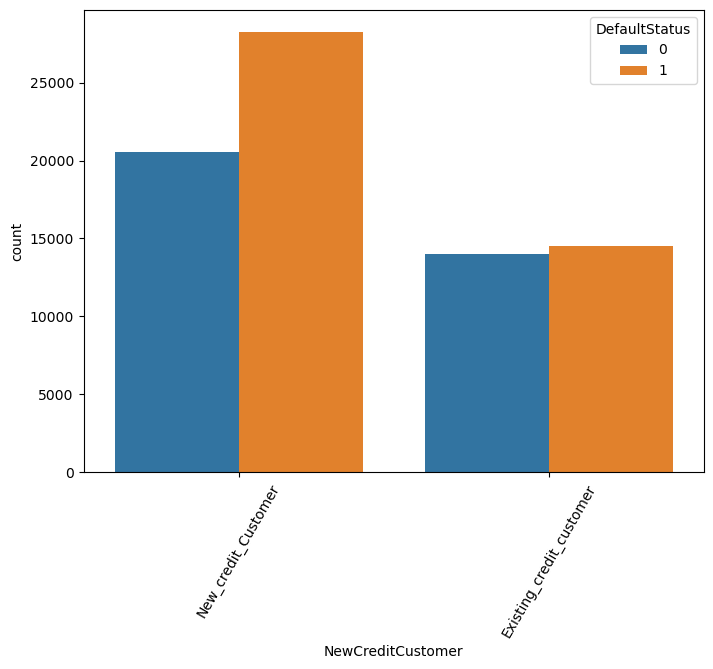

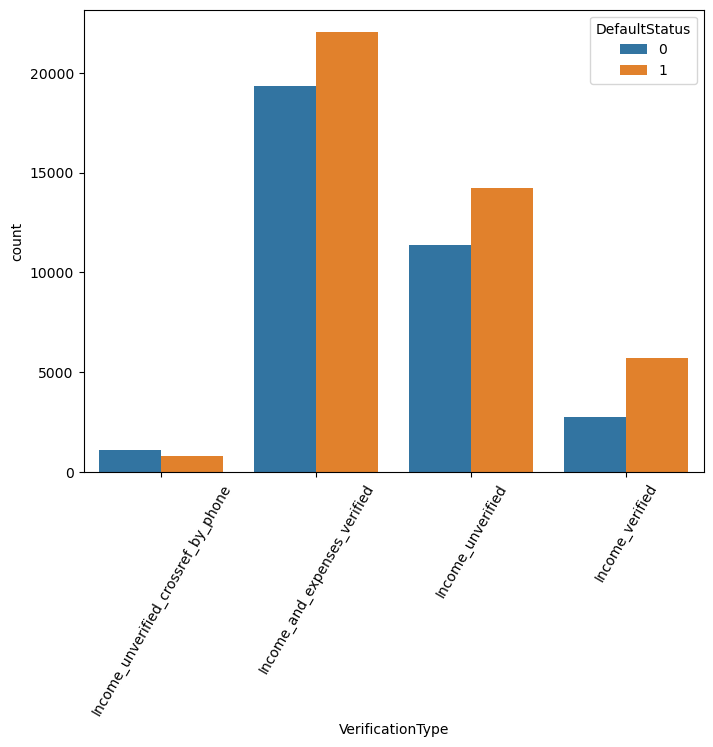

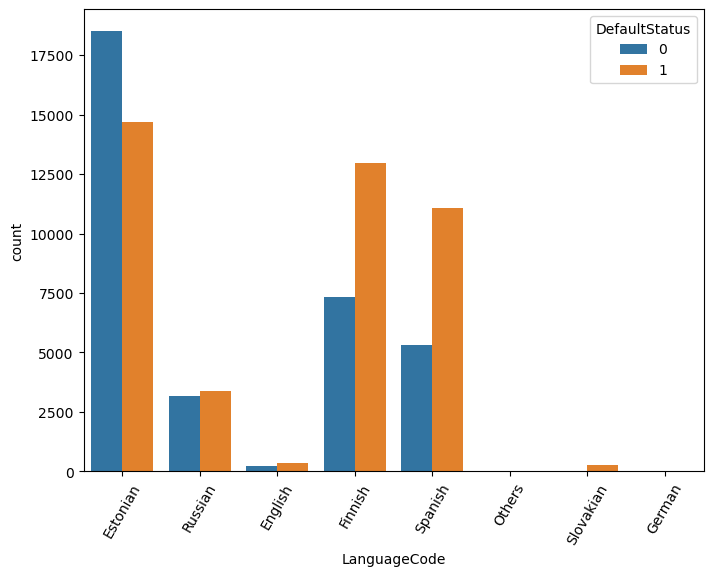

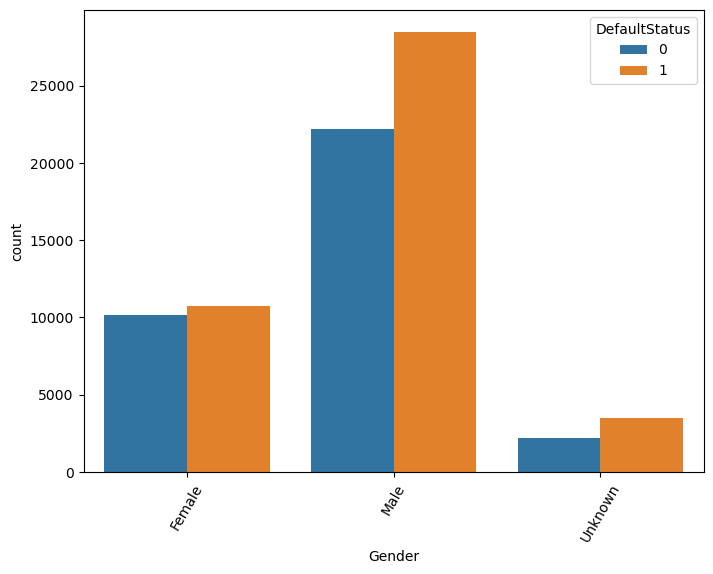

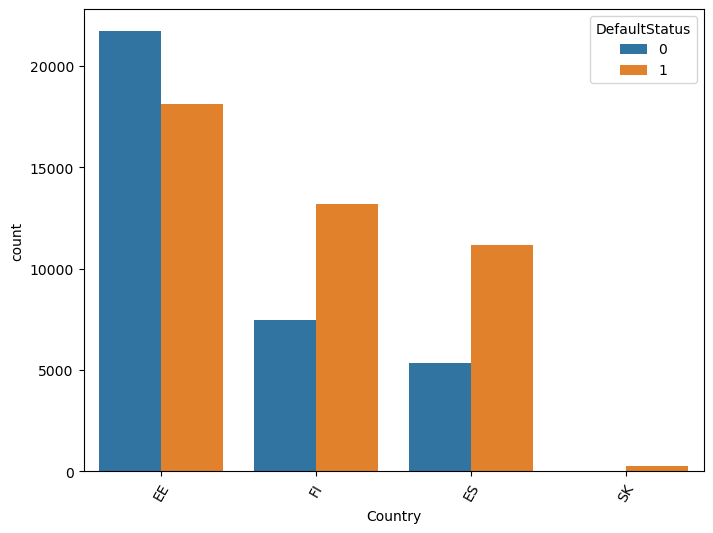

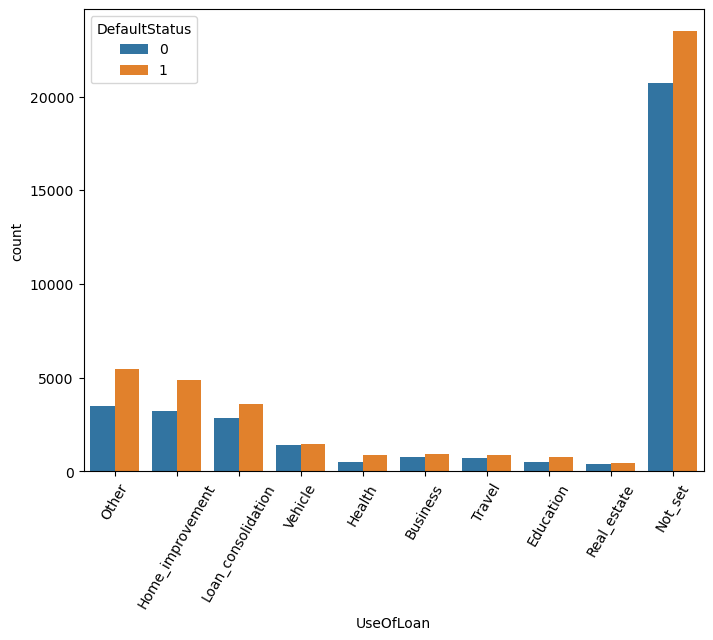

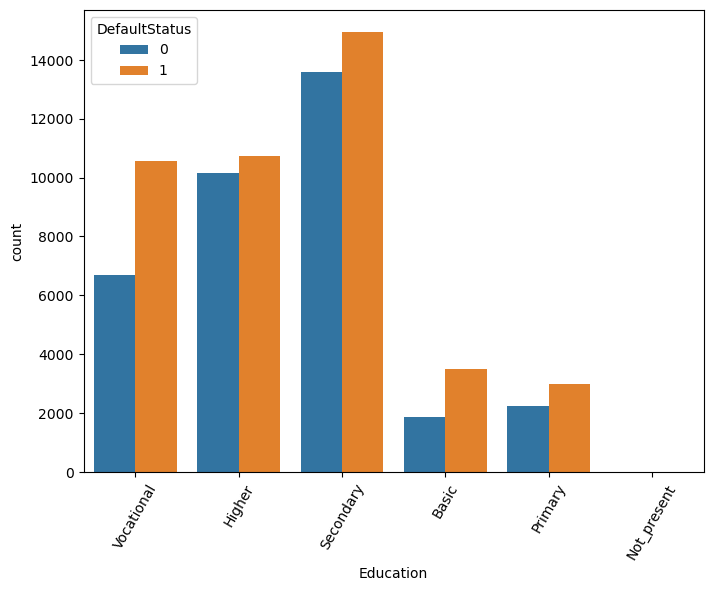

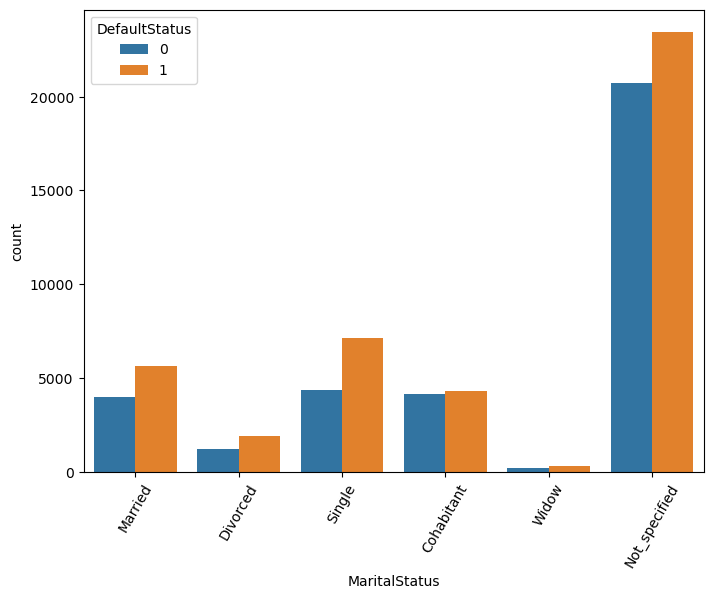

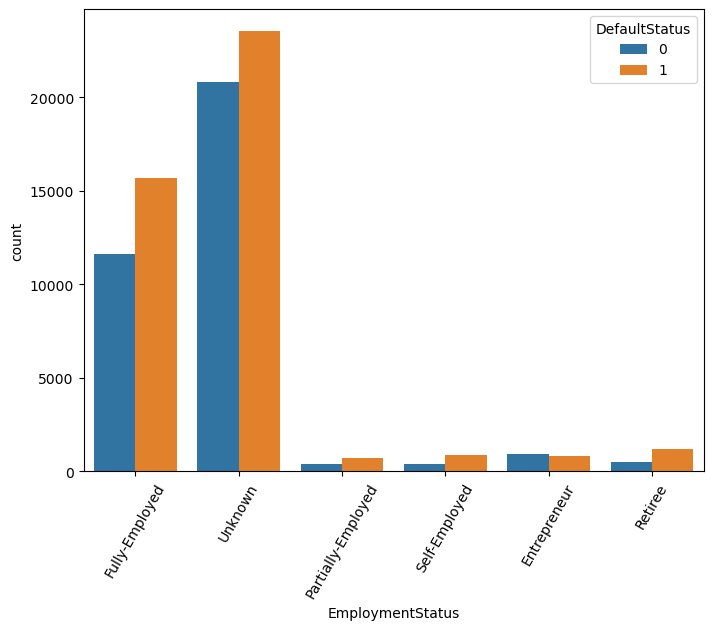

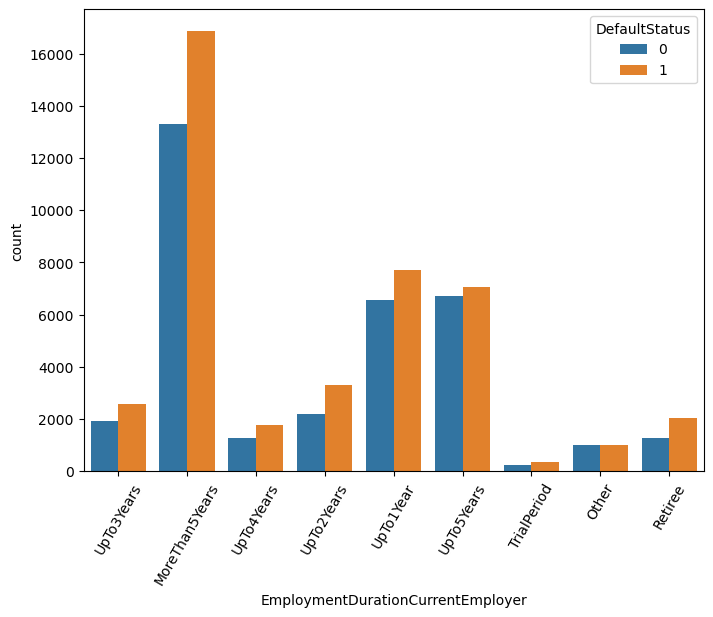

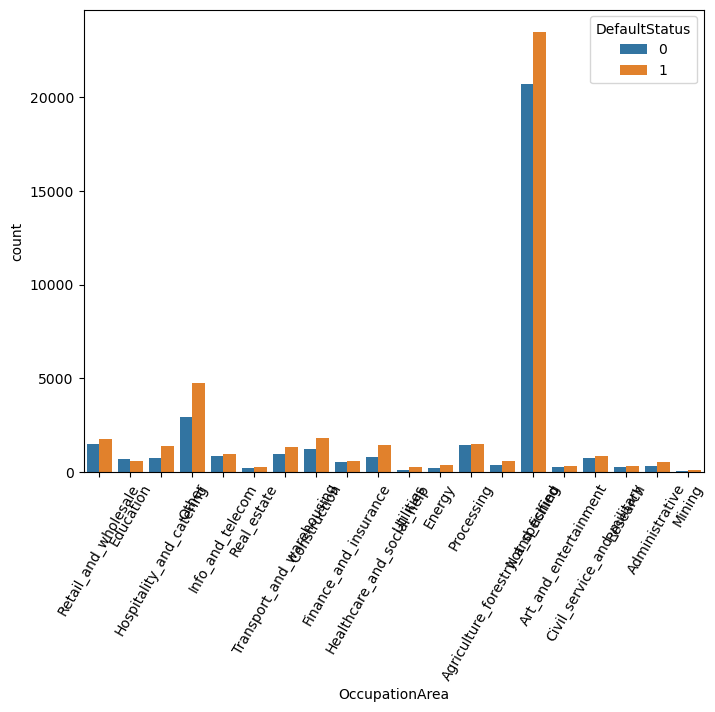

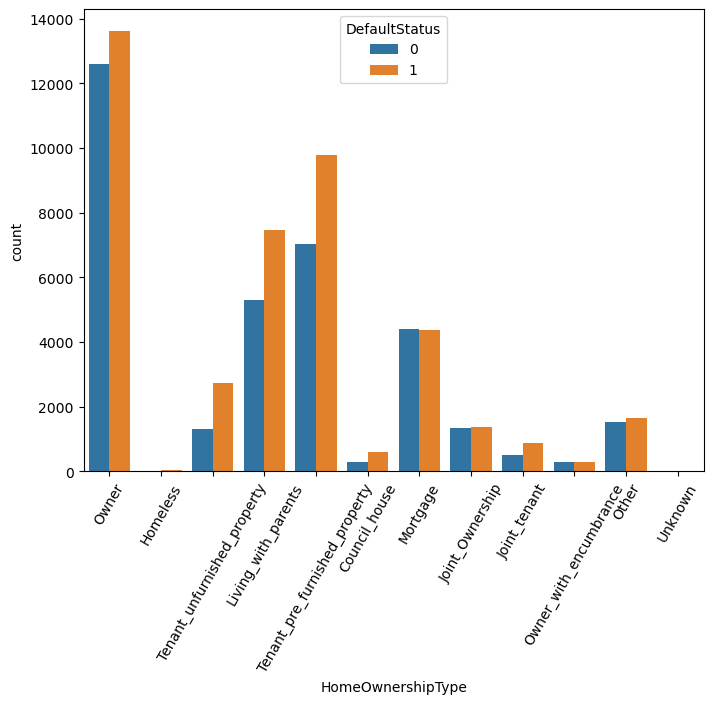

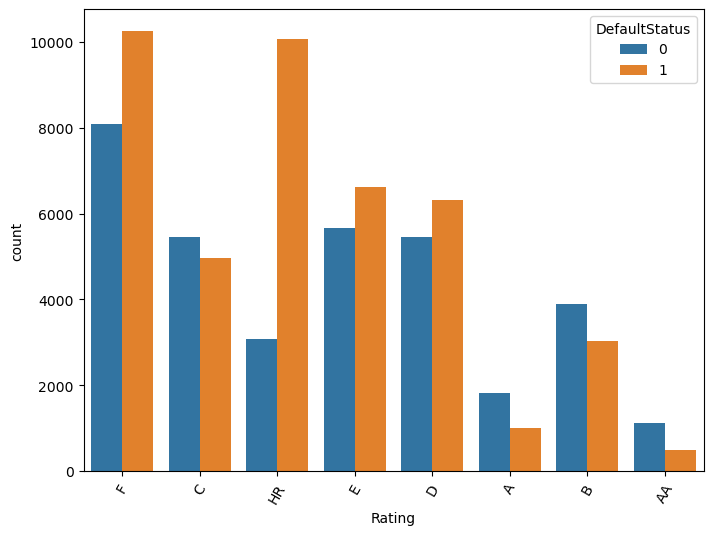

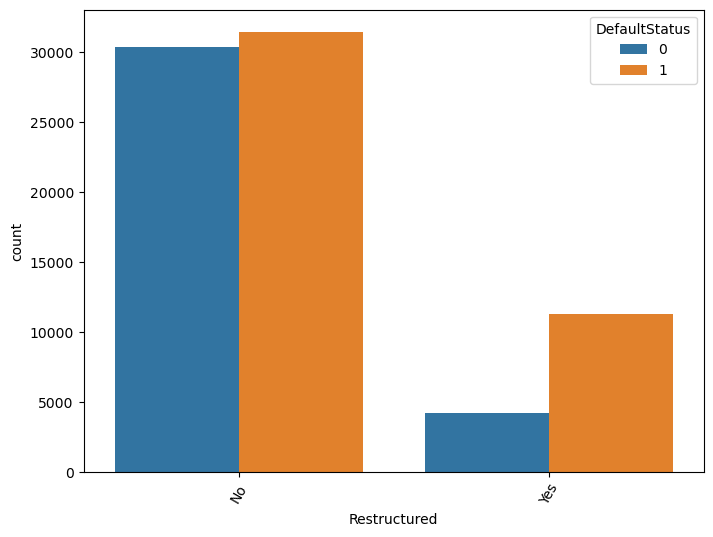

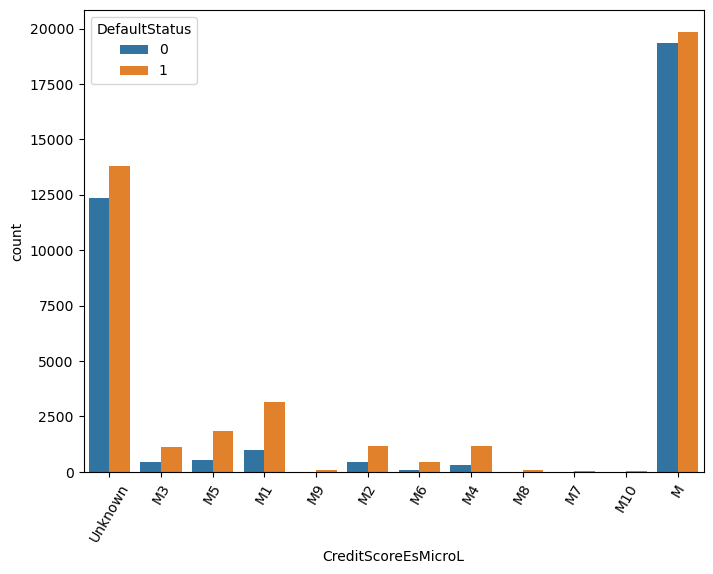

In [74]:
for col in cat_cols:
    plt.figure(figsize=(8,6))
    sns.countplot(data=data1,x=col, hue='DefaultStatus')
    plt.xticks(rotation=60)
    plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

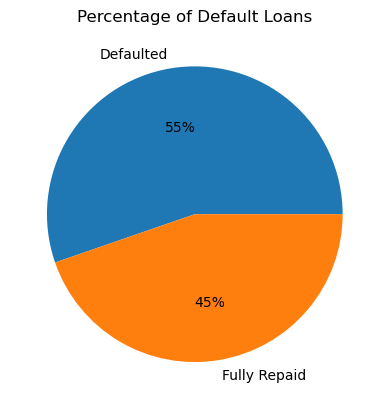

In [75]:
plt.title('Percentage of Default Loans')
plt.pie(data1['DefaultStatus'].value_counts(),labels=['Defaulted','Fully Repaid'] , autopct = '%0.0f%%')
plt.show

(array([0, 1, 2]),
 [Text(0, 0, 'Female'), Text(1, 0, 'Male'), Text(2, 0, 'Unknown')])

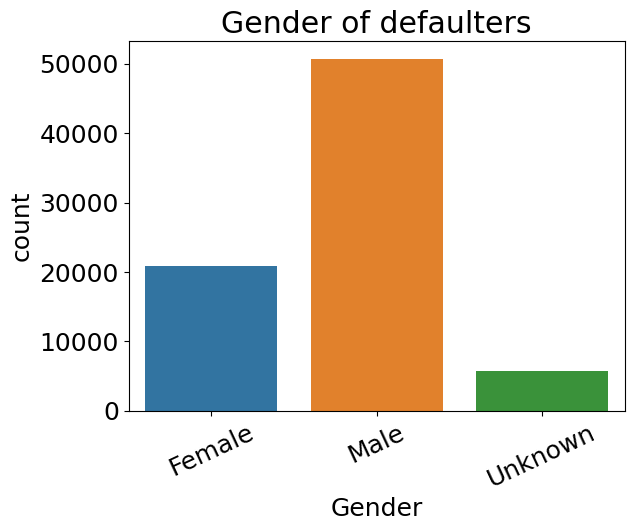

In [188]:
plt.title('Gender of defaulters')
sns.countplot(x=data1.Gender)
plt.xticks(rotation= 25)

<function matplotlib.pyplot.show(close=None, block=None)>

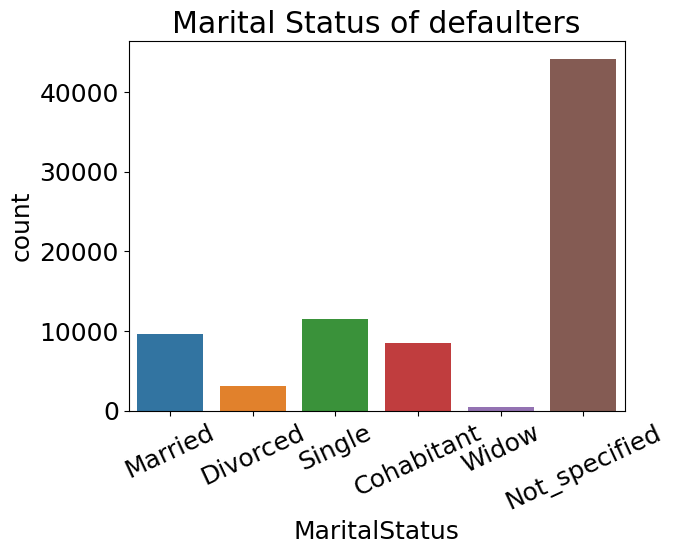

In [189]:
plt.title('Marital Status of defaulters')
sns.countplot(x=data1.MaritalStatus)
plt.xticks(rotation= 25)
plt.show

Highest number of defaulters who have not specified their marital status

<function matplotlib.pyplot.show(close=None, block=None)>

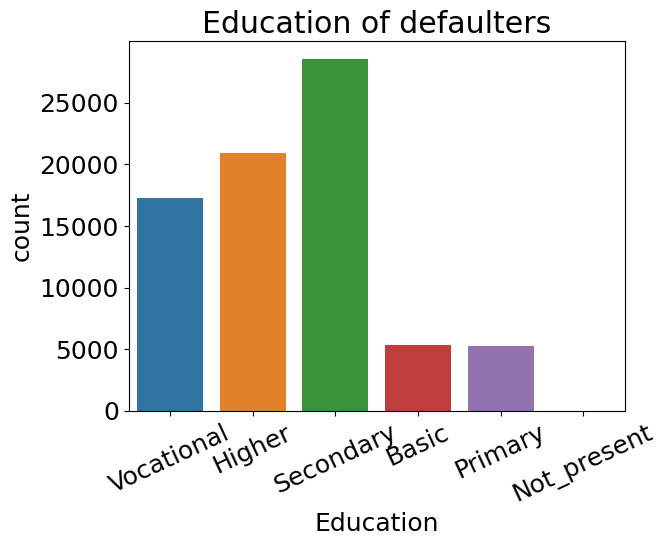

In [190]:
plt.title('Education of defaulters')
sns.countplot(x=data1.Education)
plt.xticks(rotation= 25)
plt.show

We can see that the secondary level of education has the highest number of defaulters

<function matplotlib.pyplot.show(close=None, block=None)>

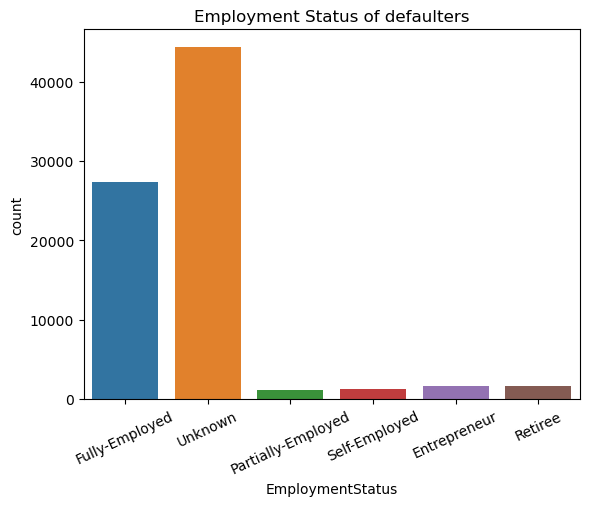

In [77]:
plt.title('Employment Status of defaulters')
sns.countplot(x=data1.EmploymentStatus)
plt.xticks(rotation= 25)
plt.show

Here we see borrowers who didn’t specify their employment status have the highest number of default loans.

<function matplotlib.pyplot.show(close=None, block=None)>

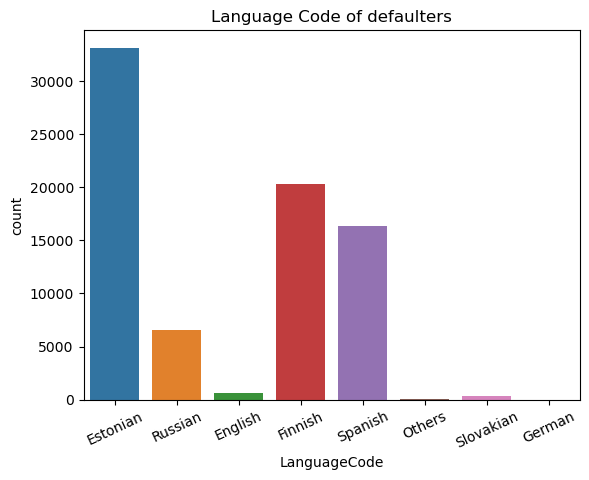

In [78]:
plt.title('Language Code of defaulters')
sns.countplot(x=data1.LanguageCode)
plt.xticks(rotation= 25)
plt.show

# bivariate analysis

<function matplotlib.pyplot.show(close=None, block=None)>

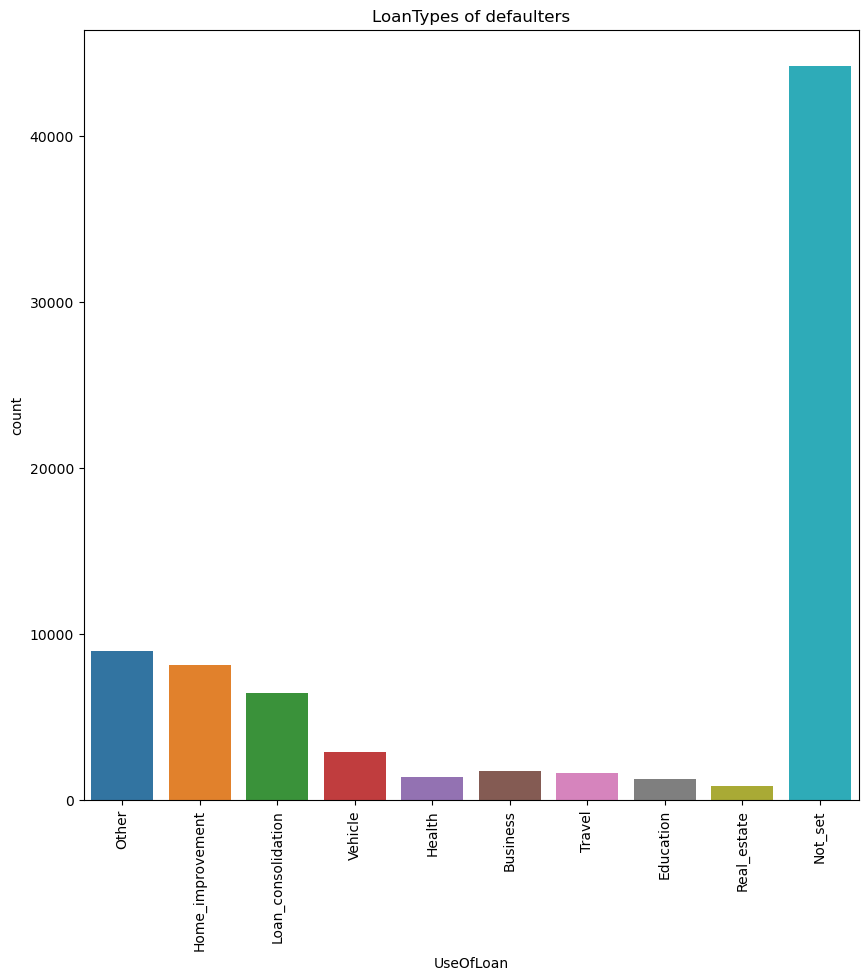

In [79]:
plt.figure(figsize=(10,10))
plt.title('LoanTypes of defaulters')
sns.countplot(x=data1.UseOfLoan)
plt.xticks(rotation= 90)
plt.show

We see that the most defaulted loans are which having no purpose to borrow but Other and Home improvement are second and third most defaulted loans

<function matplotlib.pyplot.show(close=None, block=None)>

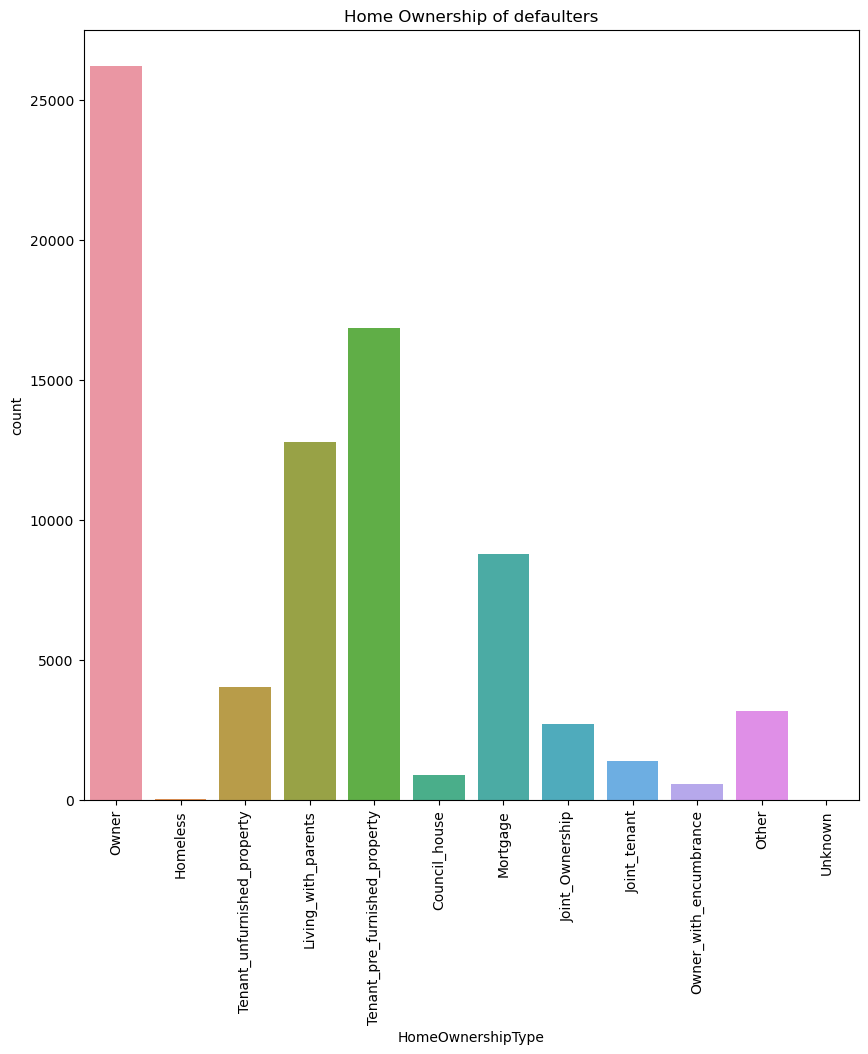

In [80]:
plt.figure(figsize=(10,10))
plt.title('Home Ownership of defaulters')
sns.countplot(x=data1.HomeOwnershipType)
plt.xticks(rotation=90)
plt.show

The owners of the houses have defaulted the most

<function matplotlib.pyplot.show(close=None, block=None)>

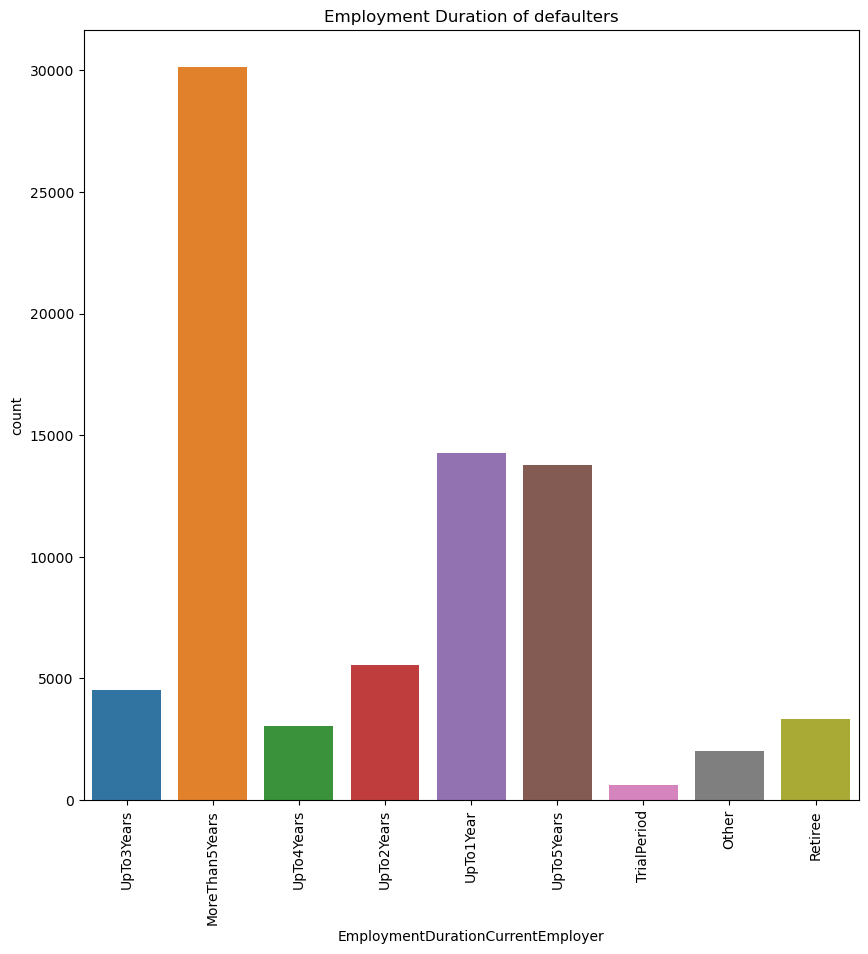

In [81]:
plt.figure(figsize=(10,10))
plt.title('Employment Duration of defaulters')
sns.countplot(x=data1.EmploymentDurationCurrentEmployer)
plt.xticks(rotation= 90)
plt.show

Most defaulters have more than 5 year of employment while the second most defaulter who have employment of up to 1 year.

<function matplotlib.pyplot.show(close=None, block=None)>

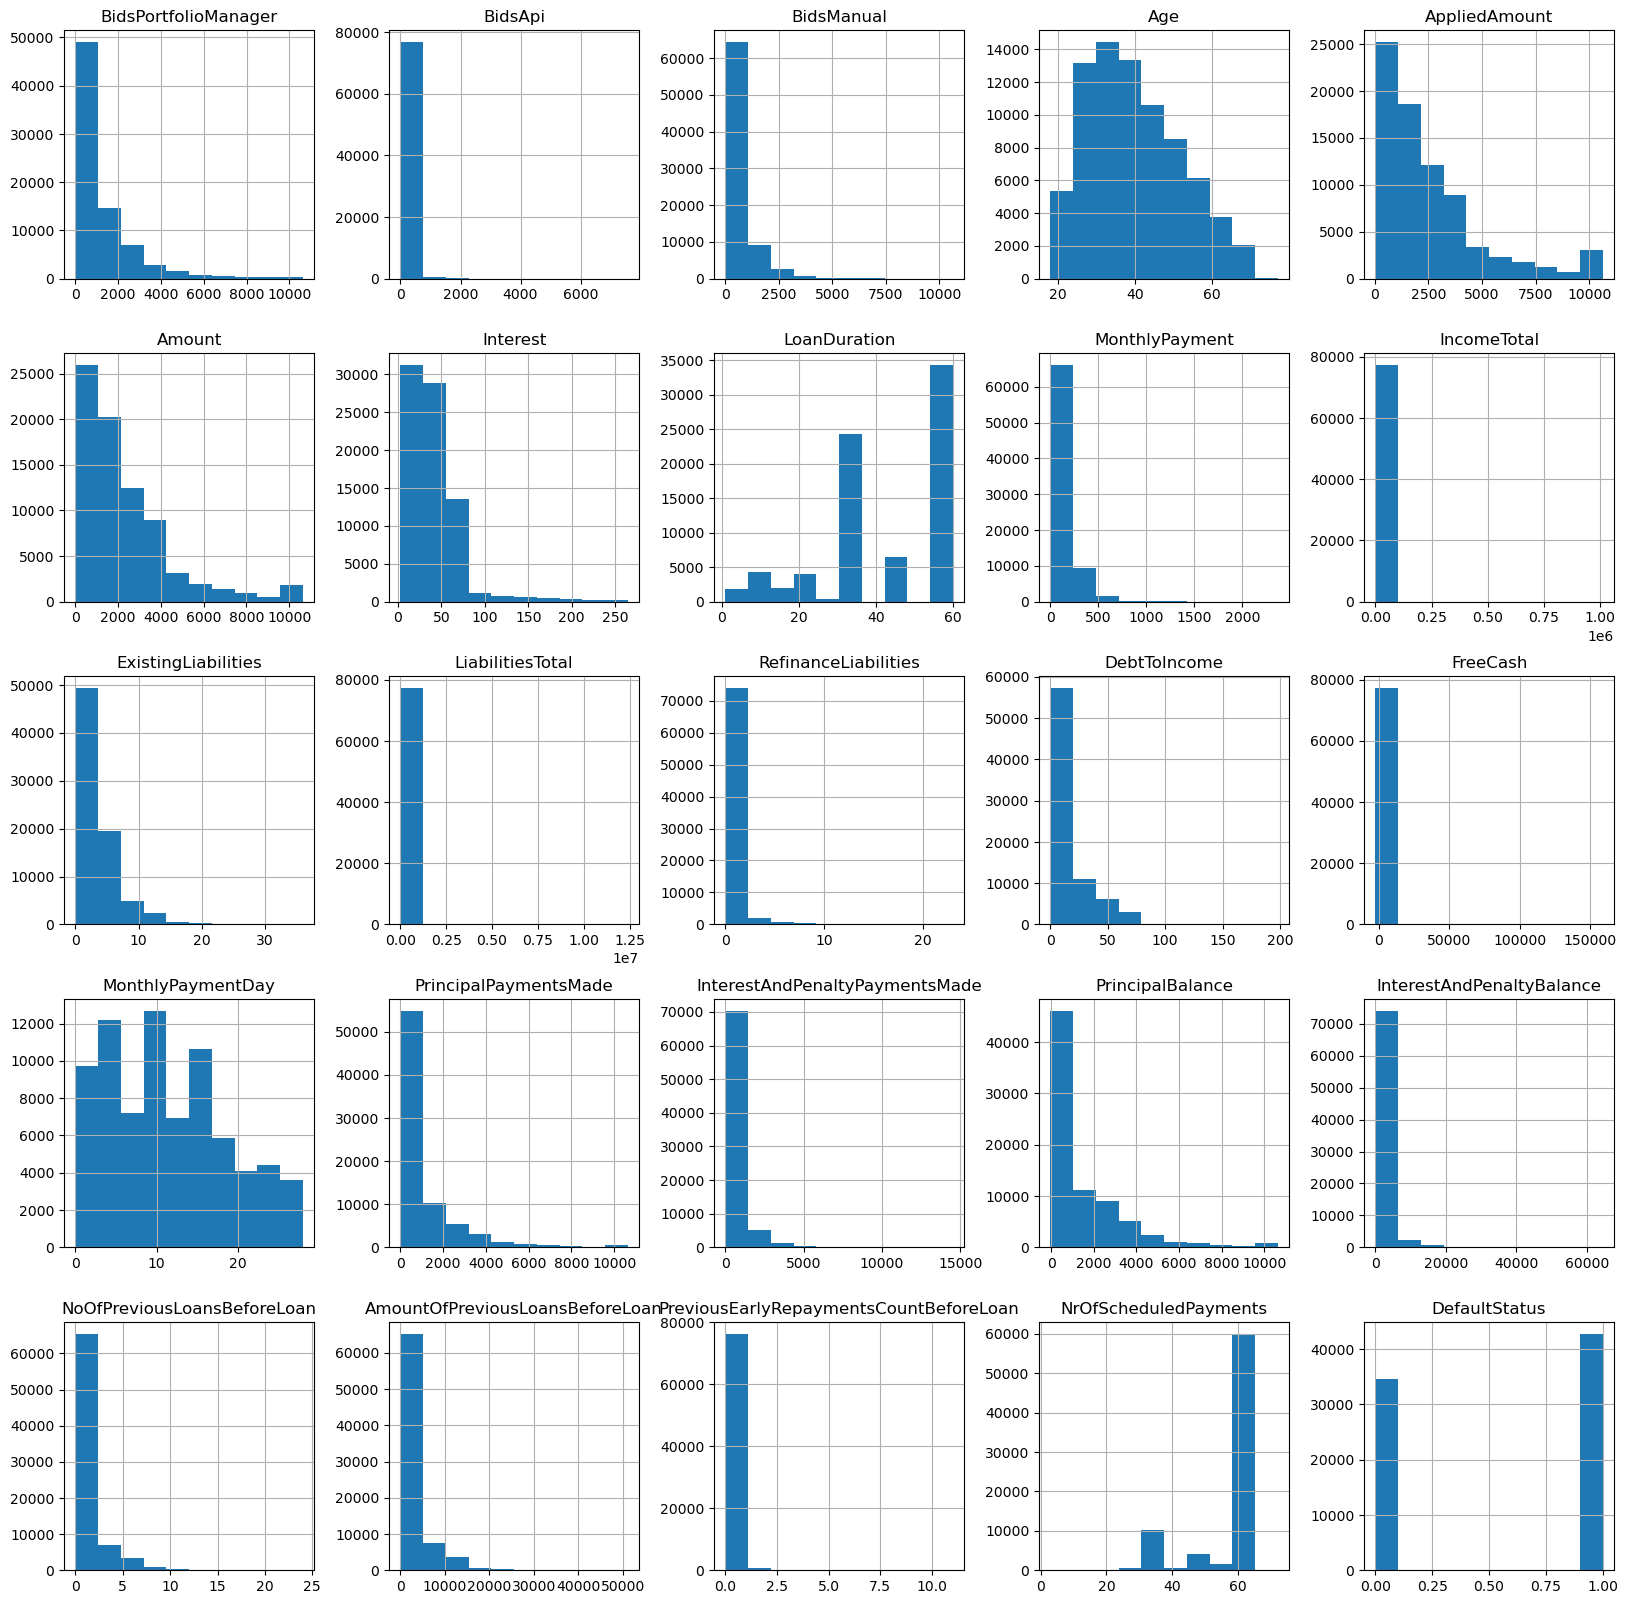

In [82]:
data1.hist(figsize=(20,20))
plt.show

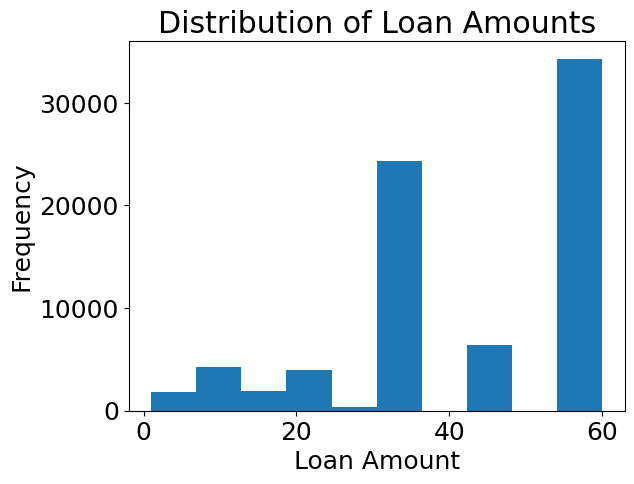

In [191]:
import matplotlib.pyplot as plt
plt.hist(data1['LoanDuration'], bins=10)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amounts')
plt.show()

Text(0, 0.5, 'BidsApi')

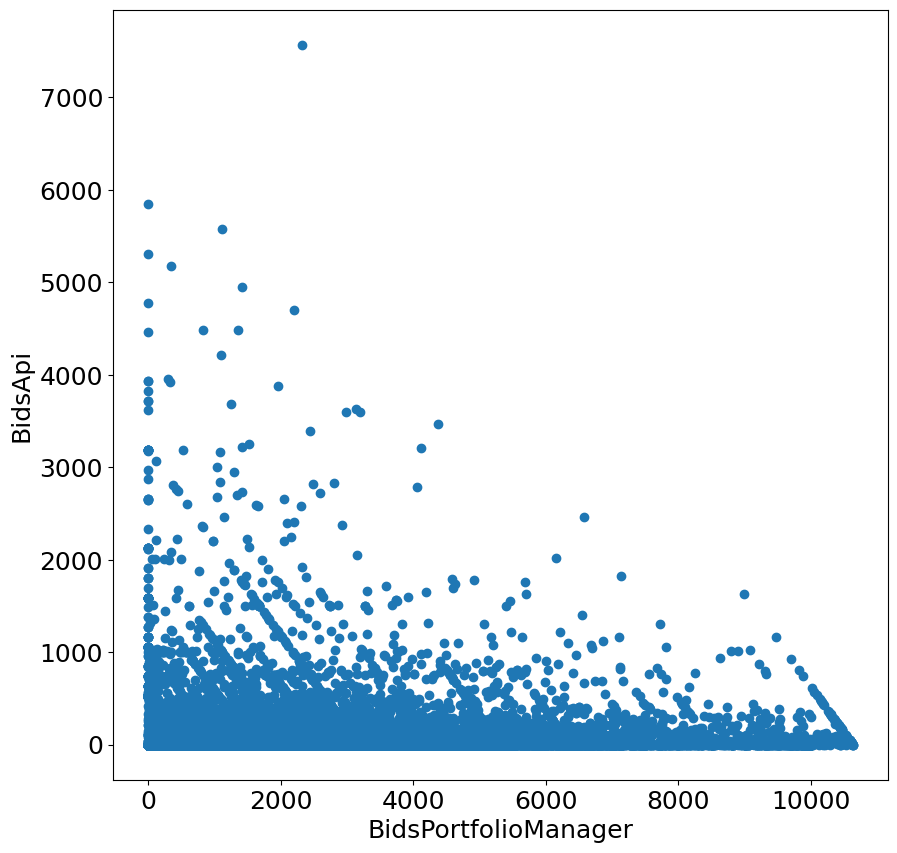

In [192]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(x='BidsPortfolioManager',y='BidsApi',data=data1)
plt.xlabel('BidsPortfolioManager')
plt.ylabel('BidsApi')

Text(0, 0.5, 'Interest')

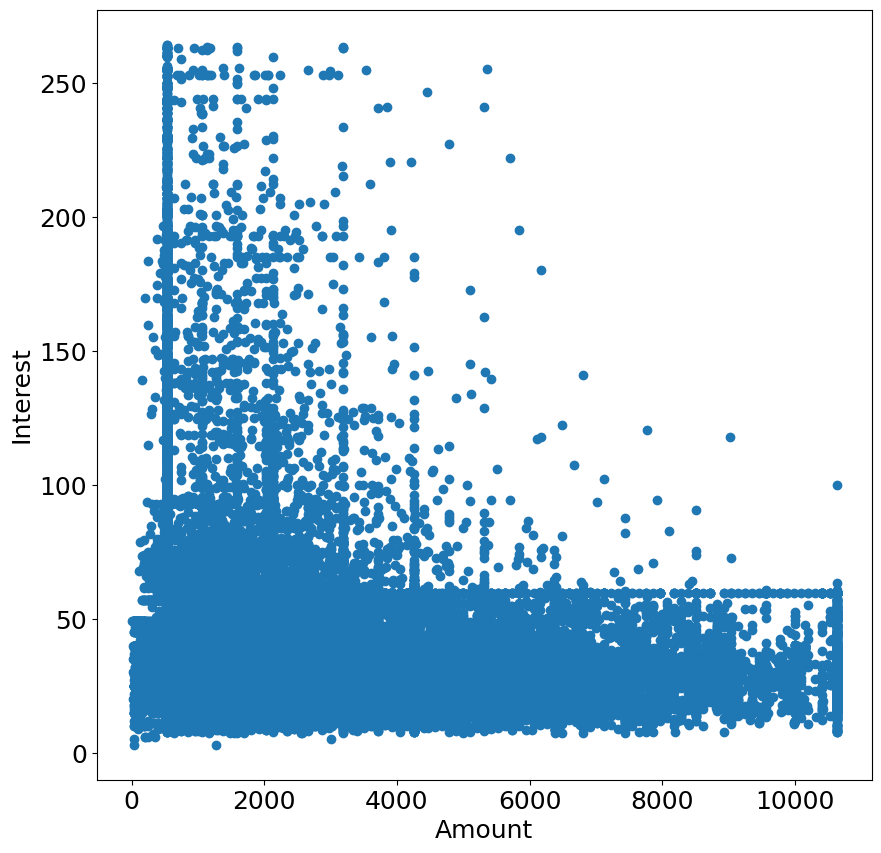

In [193]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(x='Amount',y='Interest', data =data1)
plt.xlabel('Amount')
plt.ylabel('Interest')

Text(0, 0.5, 'Count')

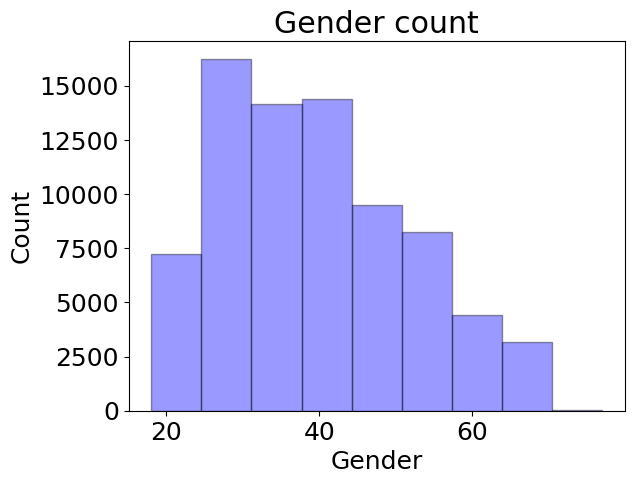

In [194]:
import seaborn as sns 
sns.distplot(data1['Age'],hist=True, kde=False,
            bins=9,color= 'blue',
            hist_kws={'edgecolor':'black'})
#Add labels
plt.title('Gender count')
plt.xlabel('Gender')
plt.ylabel('Count')

Text(0.5, 0, 'Gender')

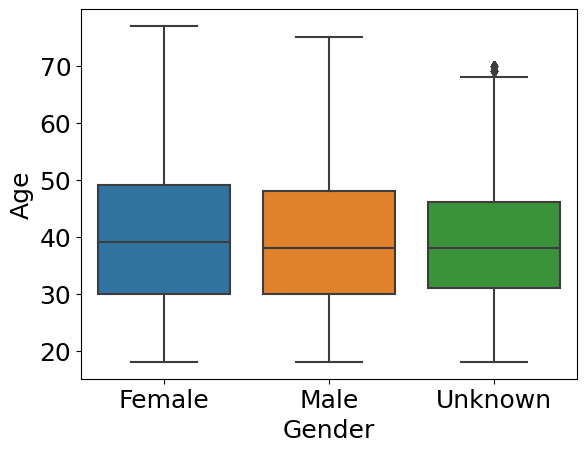

In [195]:
#BOX OLOT
sns.boxplot(y="Age",data= data1, x="Gender")
plt.xlabel("Gender")

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

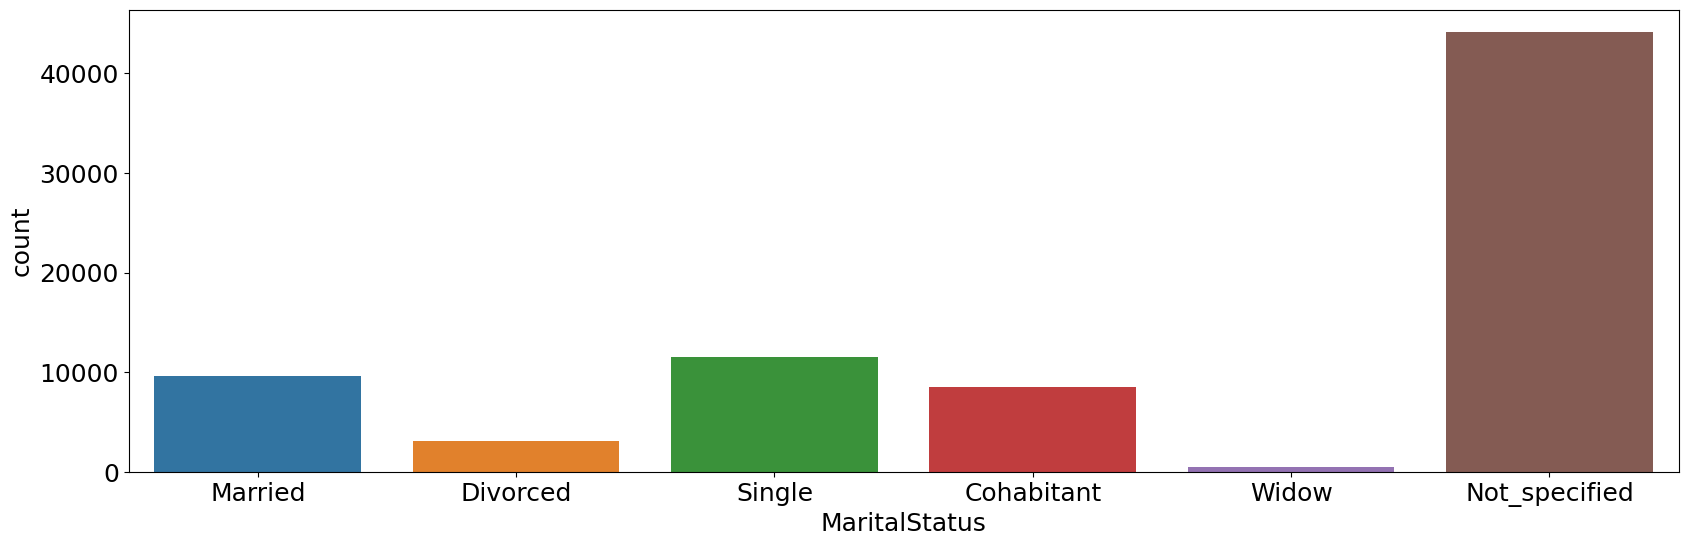

In [196]:
plt.figure(figsize=(20,6))
sns.countplot(x ='MaritalStatus', data =data1)

<AxesSubplot:xlabel='Gender', ylabel='count'>

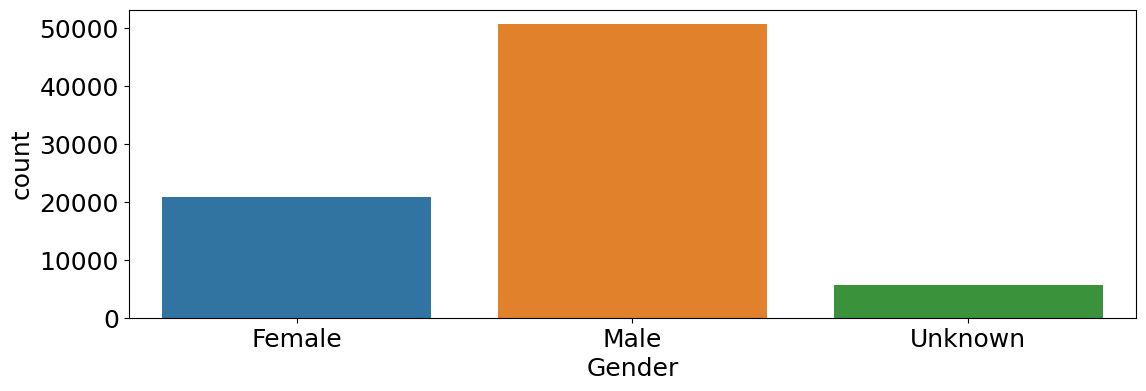

In [197]:
plt.figure(figsize=(13,4))
sns.countplot(data1.Gender)

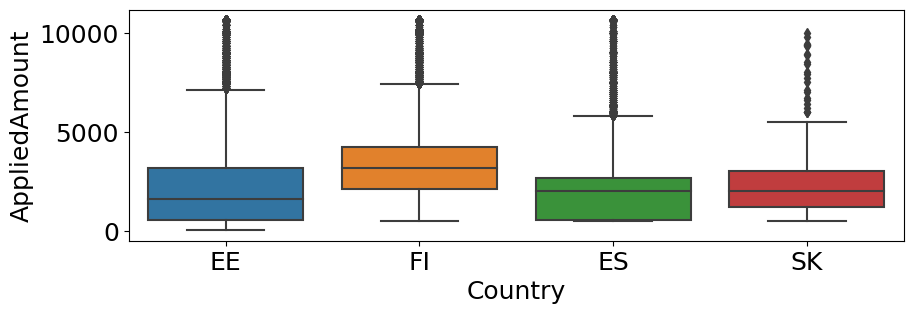

In [198]:
# B/W 'Country' and 'AppliedAmount'
plt.figure(figsize=(10, 3))
sns.boxplot(x=data1['Country'], y=data1['AppliedAmount'])
plt.show()

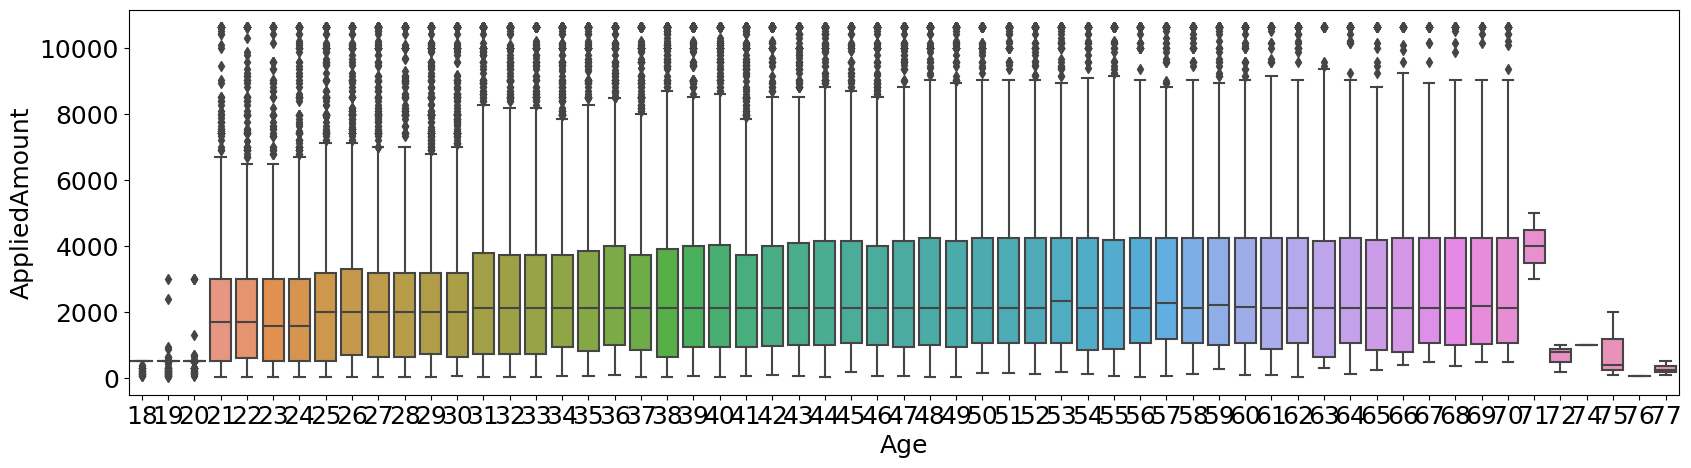

In [199]:
# B/W 'AppliedAmount' & 'Age'
plt.figure(figsize=(20, 5))
sns.boxplot(x=data1['Age'], y=data1['AppliedAmount'])
plt.show()

In [83]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

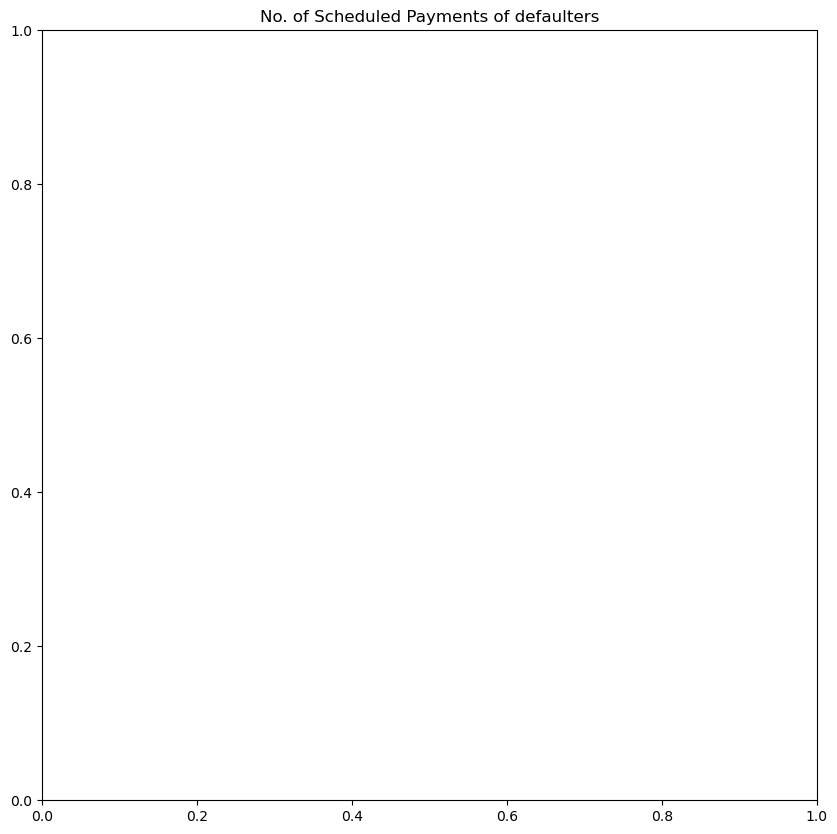

In [84]:
plt.figure(figsize=(10,10))
plt.title('No. of Scheduled Payments of defaulters')
sns.histplot(data1,x='NrOfScheduledPayments',binwidth=5)
plt.xticks(rotation= 90)
plt.show

Most defaulters has 60 no. of scheduled payments and second most has 35 no. of scheduled payments

### Multivariate Analysis

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),cbar=True,annot=True,cmap='Blues',fmt=".0%")

In [ ]:
sns.displot(data1,x='Age',binwidth=5,kde=True,hue='Gender')

from above observations we can see the average age of the defaults is from 30 to 40 years. and Males have the highest number of default loans as compare to Female and unknown gender

In [ ]:
data1

In [ ]:
import matplotlib.pyplot as plt
plt.hist(data1['LoanDuration'], bins=10)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amounts')
plt.show()

# Feature Engineering

In [90]:
#This code creates two new dataframes, data_cat_cols and data_num_cols, which contain the categorical columns and numerical columns from the original dataframe 
data_cat_cols=pd.DataFrame(data1[cat_cols])
data_num_cols=pd.DataFrame(data1[num_cols])

In [91]:
#This code is used to access and display the dataframe data_cat_cols.
data_cat_cols

NewCreditCustomer                     VerificationType  \
0            New_credit_Customer  Income_unverified_crossref_by_phone   
1       Existing_credit_customer  Income_unverified_crossref_by_phone   
2            New_credit_Customer  Income_unverified_crossref_by_phone   
3            New_credit_Customer  Income_unverified_crossref_by_phone   
4            New_credit_Customer  Income_unverified_crossref_by_phone   
...                          ...                                  ...   
134524       New_credit_Customer                      Income_verified   
134525  Existing_credit_customer                      Income_verified   
134526       New_credit_Customer                    Income_unverified   
134527  Existing_credit_customer         Income_and_expenses_verified   
134528  Existing_credit_customer         Income_and_expenses_verified   

       LanguageCode  Gender Country           UseOfLoan   Education  \
0          Estonian  Female      EE               Other  Vocational   
1          Estonian  Female      EE               Other      Higher   
2          Estonian  Female      EE    Home_improvement   Secondary   
3          Estonian  Female      EE  Loan_consolidation       Basic   
4          Estonian  Female      EE             Vehicle   Secondary   
...             ...     ...     ...                 ...         ...   
134524      Finnish    Male      FI  Loan_consolidation  Vocational   
134525      Finnish    Male      FI    Home_improvement  Vocational   
134526      Finnish    Male      FI  Loan_consolidation  Vocational   
134527     Estonian  Female      EE               Other      Higher   
134528     Estonian  Female      EE  Loan_consolidation   Secondary   

       MaritalStatus EmploymentStatus EmploymentDurationCurrentEmployer  \
0            Married   Fully-Employed                        UpTo3Years   
1           Divorced   Fully-Employed                    MoreThan5Years   
2            Married   Fully-Employed                        UpTo4Years   
3             Single          Unknown                        UpTo2Years   
4         Cohabitant   Fully-Employed                        UpTo2Years   
...              ...              ...                               ...   
134524        Single   Fully-Employed                    MoreThan5Years   
134525        Single   Fully-Employed                    MoreThan5Years   
134526       Married     Entrepreneur                    MoreThan5Years   
134527       Married   Fully-Employed                    MoreThan5Years   
134528        Single   Fully-Employed                        UpTo3Years   

                          OccupationArea            HomeOwnershipType Rating  \
0                   Retail_and_wholesale                        Owner      F   
1                              Education                        Owner      F   
2               Hospitality_and_catering                        Owner      F   
3                                  Other                        Owner      F   
4                   Retail_and_wholesale                        Owner      F   
...                                  ...                          ...    ...   
134524                             Other                Council_house      E   
134525         Transport_and_warehousing                        Owner      B   
134526                      Construction                        Owner      D   
134527        Healthcare_and_social_help  Tenant_unfurnished_property      B   
134528  Agriculture_forestry_and_fishing          Living_with_parents      D   

       Restructured CreditScoreEsMicroL  
0                No             Unknown  
1                No             Unknown  
2               Yes             Unknown  
3                No             Unknown  
4                No             Unknown  
...             ...                 ...  
134524           No             Unknown  
134525           No             Unknown  
134526           No             Unknown  
134

In [92]:
#This code concatenates data_cat_cols and data_num_cols dataframes along the columns (axis=1) and assigns the result to the loan_data dataframe
loan_data=pd.concat([data_cat_cols,data_num_cols], axis=1)
loan_data

NewCreditCustomer                     VerificationType  \
0            New_credit_Customer  Income_unverified_crossref_by_phone   
1       Existing_credit_customer  Income_unverified_crossref_by_phone   
2            New_credit_Customer  Income_unverified_crossref_by_phone   
3            New_credit_Customer  Income_unverified_crossref_by_phone   
4            New_credit_Customer  Income_unverified_crossref_by_phone   
...                          ...                                  ...   
134524       New_credit_Customer                      Income_verified   
134525  Existing_credit_customer                      Income_verified   
134526       New_credit_Customer                    Income_unverified   
134527  Existing_credit_customer         Income_and_expenses_verified   
134528  Existing_credit_customer         Income_and_expenses_verified   

       LanguageCode  Gender Country           UseOfLoan   Education  \
0          Estonian  Female      EE               Other  Vocational   
1          Estonian  Female      EE               Other      Higher   
2          Estonian  Female      EE    Home_improvement   Secondary   
3          Estonian  Female      EE  Loan_consolidation       Basic   
4          Estonian  Female      EE             Vehicle   Secondary   
...             ...     ...     ...                 ...         ...   
134524      Finnish    Male      FI  Loan_consolidation  Vocational   
134525      Finnish    Male      FI    Home_improvement  Vocational   
134526      Finnish    Male      FI  Loan_consolidation  Vocational   
134527     Estonian  Female      EE               Other      Higher   
134528     Estonian  Female      EE  Loan_consolidation   Secondary   

       MaritalStatus EmploymentStatus EmploymentDurationCurrentEmployer  \
0            Married   Fully-Employed                        UpTo3Years   
1           Divorced   Fully-Employed                    MoreThan5Years   
2            Married   Fully-Employed                        UpTo4Years   
3             Single          Unknown                        UpTo2Years   
4         Cohabitant   Fully-Employed                        UpTo2Years   
...              ...              ...                               ...   
134524        Single   Fully-Employed                    MoreThan5Years   
134525        Single   Fully-Employed                    MoreThan5Years   
134526       Married     Entrepreneur                    MoreThan5Years   
134527       Married   Fully-Employed                    MoreThan5Years   
134528        Single   Fully-Employed                        UpTo3Years   

                          OccupationArea            HomeOwnershipType Rating  \
0                   Retail_and_wholesale                        Owner      F   
1                              Education                        Owner      F   
2               Hospitality_and_catering                        Owner      F   
3                                  Other                        Owner      F   
4                   Retail_and_wholesale                        Owner      F   
...                                  ...                          ...    ...   
134524                             Other                Council_house      E   
134525         Transport_and_warehousing                        Owner      B   
134526                      Construction                        Owner      D   
134527        Healthcare_and_social_help  Tenant_unfurnished_property      B   
134528  Agriculture_forestry_and_fishing          Living_with_parents      D   

       Restructured CreditScoreEsMicroL  BidsPortfolioManager  BidsApi  \
0                No             Unknown                     0        0   
1                No             Unknown                     0        0   
2               Yes             Unknown                     0        0   
3                No             Unknown                     0        0   
4                No             Unknown              

In [93]:
#This code creates a copy of the loan_data dataframe and assigns it to X. It then removes the column 'DefaultStatus' from X and assigns the removed column to y.
X=loan_data.copy()
y=X.pop('DefaultStatus')

In [94]:
#This code creates a new dataframe y from the series y and displays the y dataframe.
y=pd.DataFrame(y)
y

DefaultStatus
0                   0
1                   0
2                   1
3                   0
4                   1
...               ...
134524              1
134525              0
134526              1
134527              1
134528              1

[77341 rows x 1 columns]

In [95]:
#This code displays the dataframe X
X

NewCreditCustomer                     VerificationType  \
0            New_credit_Customer  Income_unverified_crossref_by_phone   
1       Existing_credit_customer  Income_unverified_crossref_by_phone   
2            New_credit_Customer  Income_unverified_crossref_by_phone   
3            New_credit_Customer  Income_unverified_crossref_by_phone   
4            New_credit_Customer  Income_unverified_crossref_by_phone   
...                          ...                                  ...   
134524       New_credit_Customer                      Income_verified   
134525  Existing_credit_customer                      Income_verified   
134526       New_credit_Customer                    Income_unverified   
134527  Existing_credit_customer         Income_and_expenses_verified   
134528  Existing_credit_customer         Income_and_expenses_verified   

       LanguageCode  Gender Country           UseOfLoan   Education  \
0          Estonian  Female      EE               Other  Vocational   
1          Estonian  Female      EE               Other      Higher   
2          Estonian  Female      EE    Home_improvement   Secondary   
3          Estonian  Female      EE  Loan_consolidation       Basic   
4          Estonian  Female      EE             Vehicle   Secondary   
...             ...     ...     ...                 ...         ...   
134524      Finnish    Male      FI  Loan_consolidation  Vocational   
134525      Finnish    Male      FI    Home_improvement  Vocational   
134526      Finnish    Male      FI  Loan_consolidation  Vocational   
134527     Estonian  Female      EE               Other      Higher   
134528     Estonian  Female      EE  Loan_consolidation   Secondary   

       MaritalStatus EmploymentStatus EmploymentDurationCurrentEmployer  \
0            Married   Fully-Employed                        UpTo3Years   
1           Divorced   Fully-Employed                    MoreThan5Years   
2            Married   Fully-Employed                        UpTo4Years   
3             Single          Unknown                        UpTo2Years   
4         Cohabitant   Fully-Employed                        UpTo2Years   
...              ...              ...                               ...   
134524        Single   Fully-Employed                    MoreThan5Years   
134525        Single   Fully-Employed                    MoreThan5Years   
134526       Married     Entrepreneur                    MoreThan5Years   
134527       Married   Fully-Employed                    MoreThan5Years   
134528        Single   Fully-Employed                        UpTo3Years   

                          OccupationArea            HomeOwnershipType Rating  \
0                   Retail_and_wholesale                        Owner      F   
1                              Education                        Owner      F   
2               Hospitality_and_catering                        Owner      F   
3                                  Other                        Owner      F   
4                   Retail_and_wholesale                        Owner      F   
...                                  ...                          ...    ...   
134524                             Other                Council_house      E   
134525         Transport_and_warehousing                        Owner      B   
134526                      Construction                        Owner      D   
134527        Healthcare_and_social_help  Tenant_unfurnished_property      B   
134528  Agriculture_forestry_and_fishing          Living_with_parents      D   

       Restructured CreditScoreEsMicroL  BidsPortfolioManager  BidsApi  \
0                No             Unknown                     0        0   
1                No             Unknown                     0        0   
2               Yes             Unknown                     0        0   
3                No             Unknown                     0        0   
4                No             Unknown              

In [96]:
#This code converts all object-type columns in the dataframe X to string type.
for col in X==object:
    X[col]=X[col].astype(str)

In [97]:
#This code applies label encoding to all object-type columns in the dataframe X, transforming them into numeric values. It then displays the first few rows of the modified X dataframe.
for col in X==object:
    X[col]=LabelEncoder().fit_transform(X[col])
X.head()

NewCreditCustomer  VerificationType  LanguageCode  Gender  Country  \
0                  1                 2             1       0        0   
1                  0                 2             1       0        0   
2                  1                 2             1       0        0   
3                  1                 2             1       0        0   
4                  1                 2             1       0        0   

   UseOfLoan  Education  MaritalStatus  EmploymentStatus  \
0          6          5              2                 1   
1          6          1              1                 1   
2          3          4              2                 1   
3          4          0              4                 5   
4          9          4              0                 1   

   EmploymentDurationCurrentEmployer  OccupationArea  HomeOwnershipType  \
0                                  6              17                  7   
1                                  0               5                  7   
2                                  7               9                  7   
3                                  5              13                  7   
4                                  5              17                  7   

   Rating  Restructured  CreditScoreEsMicroL  BidsPortfolioManager  BidsApi  \
0       6             0                   11                     0        0   
1       6             0                   11                     0        0   
2       6             1                   11                     0        0   
3       6             0                   11                     0        0   
4       6             0                   11                     0        0   

   BidsManual  Age  AppliedAmount  Amount  Interest  LoanDuration  \
0         186   43            212     144      2741             3   
1         486   30            107     404      2270             0   
2        2277   40            212    2241      2270            12   
3        3186    5             44    3685      3999             6   
4        2279    7            212    2245      2741             3   

   MonthlyPayment  IncomeTotal  ExistingLiabilities  LiabilitiesTotal  \
0           15828           82                    0                 0   
1           15828          124                    0                 0   
2           15828         3353                    0                 0   
3           15828          228                    0                 0   
4           15828         3322                    0                 0   

   RefinanceLiabilities  DebtToIncome  FreeCash  MonthlyPaymentDay  \
0                     0             0        21                 18   
1                     0             0        21                  7   
2                     0             0        21                 18   
3                     0             0        21                  7   
4                     0             0        21                 18   

   PrincipalPaymentsMade  InterestAndPenaltyPaymentsMade  PrincipalBalance  \
0                   2085                           15174                 5   
1                   4876                           15004                 5   
2                  10111                           37153              1710   
3                  24616                           12952                 5   
4                  16509                           17185                 5   

   InterestAndPenaltyBalance  NoOfPreviousLoansBeforeLoan  \
0                         10                            1   
1                         10                           12   
2                      25515                            0   
3                         10                            1   
4                         10                            1   

   AmountOfPreviousLoansBeforeLoan  PreviousRepaymentsBeforeLoan  \
0                             6996                             0   
1                             

In [98]:
#This code applies standard scaling to all non-object columns in the dataframe X, normalizing their values. It then displays the first few rows of the modified X dataframe.
for col in X!=object:
    X[col]=StandardScaler().fit_transform(X[[col]])
X.head()

NewCreditCustomer  VerificationType  LanguageCode    Gender   Country  \
0           0.764313          1.355096     -0.782552 -1.452499 -0.883231   
1          -1.308364          1.355096     -0.782552 -1.452499 -0.883231   
2           0.764313          1.355096     -0.782552 -1.452499 -0.883231   
3           0.764313          1.355096     -0.782552 -1.452499 -0.883231   
4           0.764313          1.355096     -0.782552 -1.452499 -0.883231   

   UseOfLoan  Education  MaritalStatus  EmploymentStatus  \
0   0.758037   1.123195      -0.550596         -1.220316   
1   0.758037  -1.199677      -1.424878         -1.220316   
2  -1.178884   0.542477      -0.550596         -1.220316   
3  -0.533243  -1.780395       1.197968          0.833822   
4   2.694959   0.542477      -2.299160         -1.220316   

   EmploymentDurationCurrentEmployer  OccupationArea  HomeOwnershipType  \
0                           0.872701        1.619855           0.224047   
1                          -1.057877       -1.823544           0.224047   
2                           1.194464       -0.675745           0.224047   
3                           0.550938        0.472055           0.224047   
4                           0.550938        1.619855           0.224047   

     Rating  Restructured  CreditScoreEsMicroL  BidsPortfolioManager  \
0  0.735603     -0.500663             1.335225             -1.401242   
1  0.735603     -0.500663             1.335225             -1.401242   
2  0.735603      1.997353             1.335225             -1.401242   
3  0.735603     -0.500663             1.335225             -1.401242   
4  0.735603     -0.500663             1.335225             -1.401242   

    BidsApi  BidsManual       Age  AppliedAmount    Amount  Interest  \
0 -0.558044   -1.306889  1.758319      -0.131383 -1.531322 -0.118434   
1 -0.558044   -1.073516  0.688254      -0.909713 -1.342935 -0.451594   
2 -0.558044    0.319720  1.511381      -0.131383 -0.011910 -0.451594   
3 -0.558044    1.026840 -1.369564      -1.376712  1.034362  0.771407   
4 -0.558044    0.321276 -1.204939      -0.131383 -0.009011 -0.118434   

   LoanDuration  MonthlyPayment  IncomeTotal  ExistingLiabilities  \
0     -3.027201        0.894472    -1.284977            -1.086487   
1     -3.508547        0.894472    -1.252009            -1.086487   
2     -1.583161        0.894472     1.282621            -1.086487   
3     -2.545854        0.894472    -1.170374            -1.086487   
4     -3.027201        0.894472     1.258288            -1.086487   

   LiabilitiesTotal  RefinanceLiabilities  DebtToIncome  FreeCash  \
0         -1.304101             -0.277684      -0.62091 -0.659317   
1         -1.304101             -0.277684      -0.62091 -0.659317   
2         -1.304101             -0.277684      -0.62091 -0.659317   
3         -1.304101             -0.277684      -0.62091 -0.659317   
4         -1.304101             -0.277684      -0.62091 -0.659317   

   MonthlyPaymentDay  PrincipalPaymentsMade  InterestAndPenaltyPaymentsMade  \
0           0.670572              -1.231187                       -0.351247   
1          -0.546120              -0.949866                       -0.362224   
2           0.670572              -0.422202                        1.067965   
3          -0.546120               1.039838                       -0.494724   
4           0.670572               0.222688                       -0.221394   

   PrincipalBalance  InterestAndPenaltyBalance  NoOfPreviousLoansBeforeLoan  \
0         -0.902003                  -0.890609                    -0.443295   
1         -0.902003                  -0.890609                     1.082981   
2         -0.749529                   1.040120                    -0.582048   
3         -0.902003                  -0.890609                    -0.443295   
4         -0.902003                  -0.890609                    -0.443295   

   AmountOfPreviousLoansBeforeLoan  PreviousRepaymentsBeforeLoan  \
0                   

# PCA_ PRINCIPAL COMPONENT ANALYSIS FOR DIMENSIOANLITY REDUCTION TO CHECK THE VARIANCE

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [40] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [33] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [40] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[33]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca]> [WARNING]: De parameter <y> is deprecated and will not be supported in future version. Use <labels> instead.
[pca] >Plot PC1 vs PC2 with loadings.


[datazets] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
[datazets] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


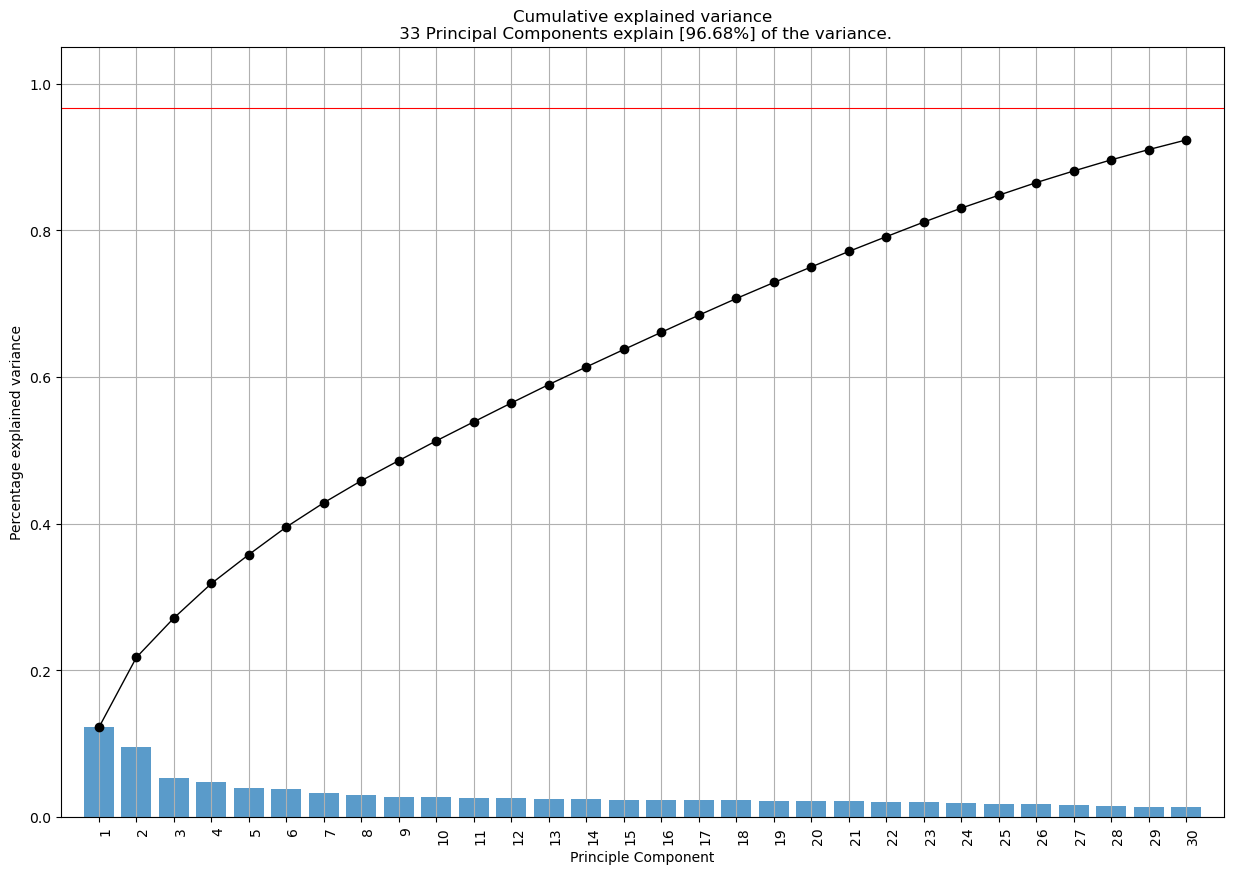

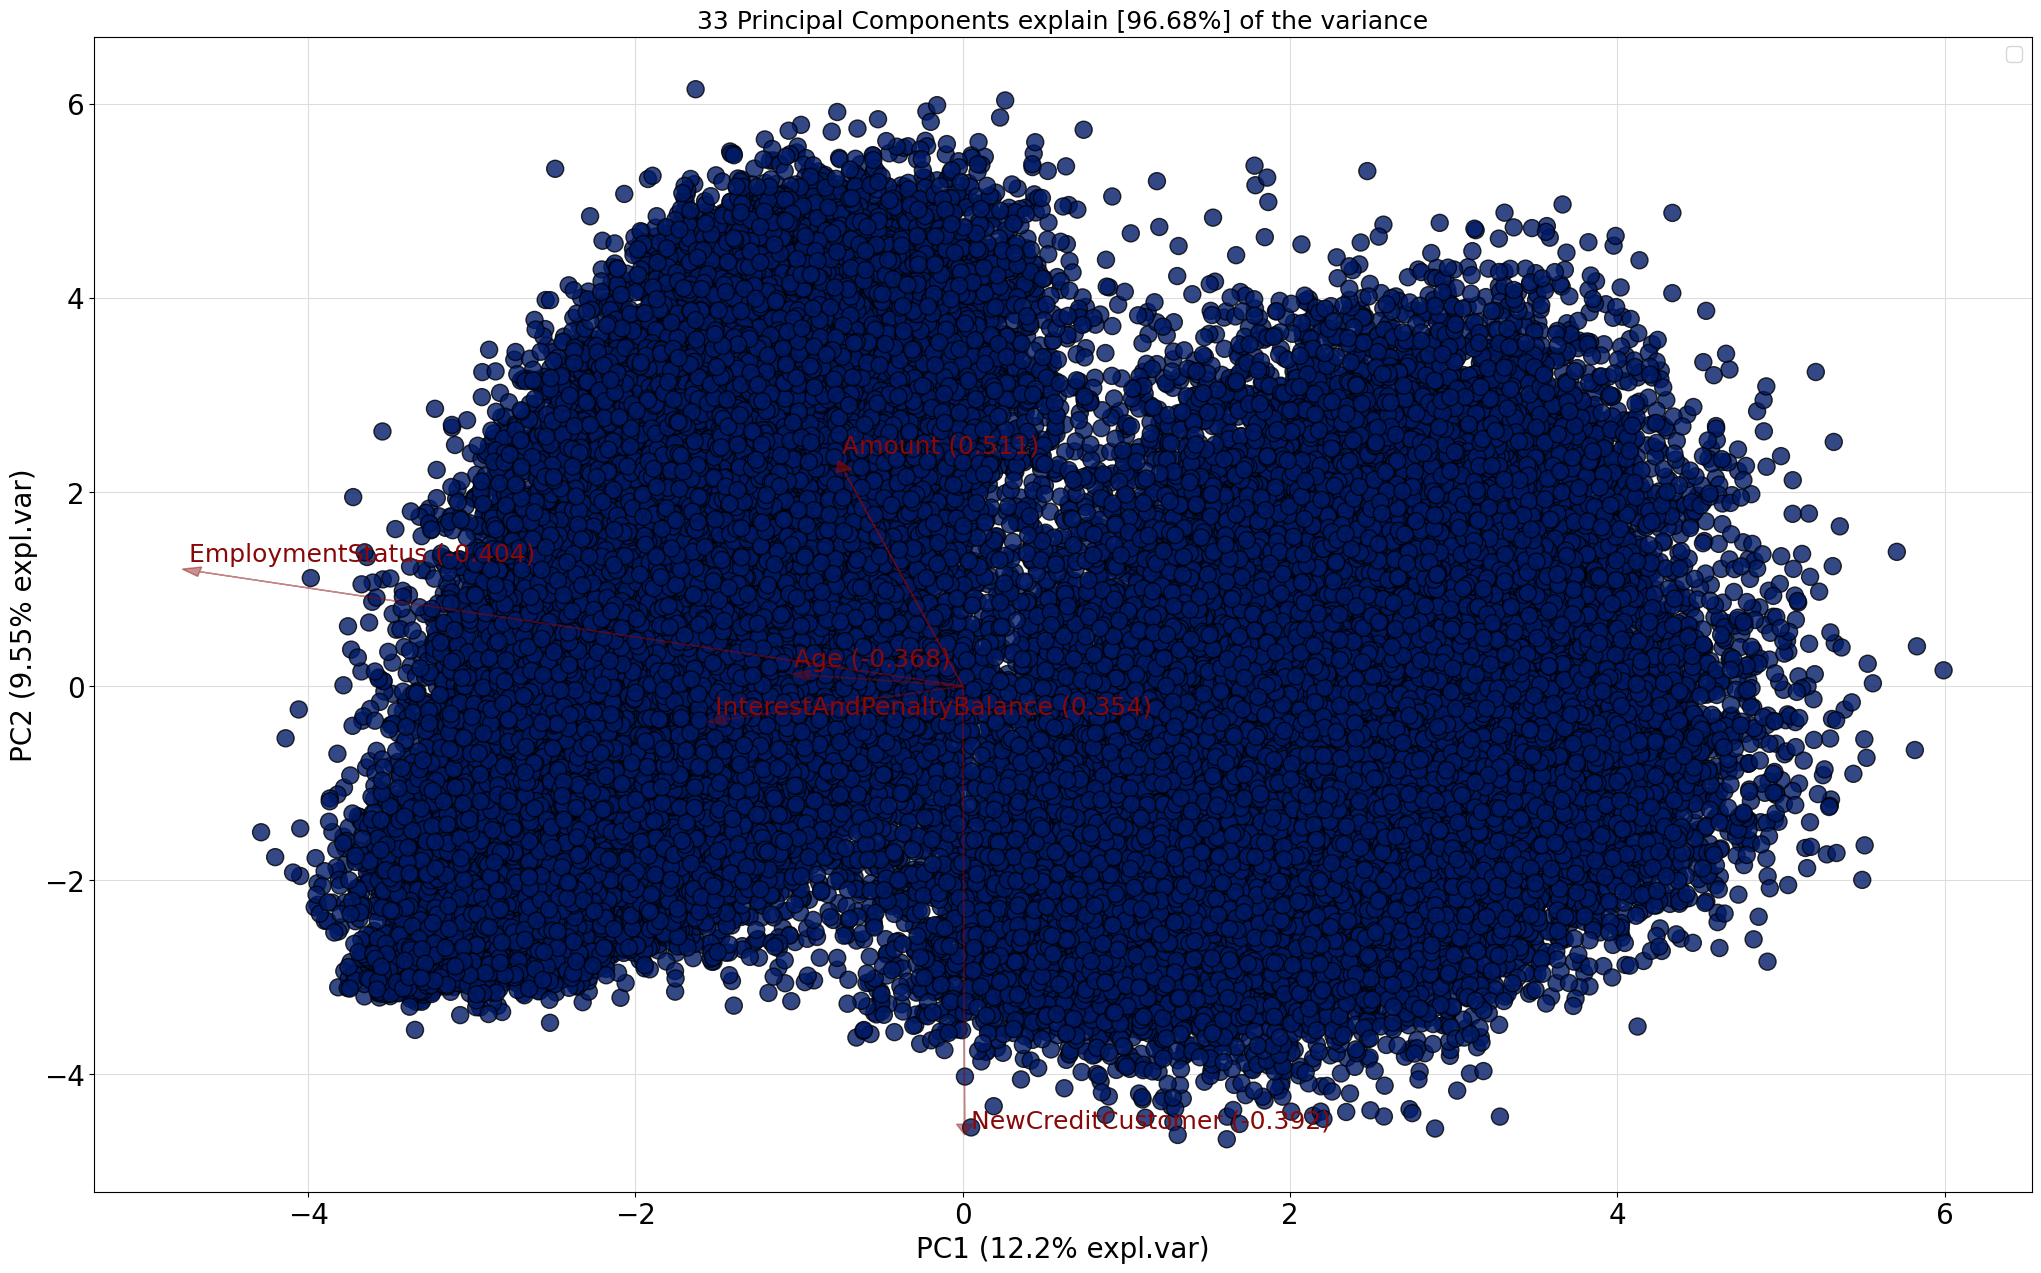

In [99]:
#This code performs PCA (Principal Component Analysis) on the normalized X dataframe. It then plots the explained variance ratio for up to 30 principal components using the plot() function and creates a biplot showing the first 5 principal components with the target variable DefaultStatus using the biplot() function. The resulting figures and axes are stored in fig and ax.
pca=pca(normalize=True)
out=pca.fit_transform(X)
fig,ax=pca.plot(n_components=30)
fig,ax=pca.biplot(n_feat=5,y=y['DefaultStatus'])

In [100]:
#This code creates a dataframe data_pca from the 'topfeat' attribute of the out variable obtained from PCA. It then selects rows from data_pca where the 'type' column is equal to 'best'.
data_pca=pd.DataFrame(out['topfeat'])
data_pca[data_pca['type']=='best']

PC                                 feature   loading  type
0    PC1                        EmploymentStatus -0.404049  best
1    PC2                       NewCreditCustomer -0.391699  best
2    PC3                                  Amount  0.510659  best
3    PC4               InterestAndPenaltyBalance  0.353843  best
4    PC5                                     Age -0.367918  best
5    PC6               InterestAndPenaltyBalance -0.344872  best
6    PC7                                     Age  0.473327  best
7    PC8                        VerificationType -0.481626  best
8    PC9                                 BidsApi -0.562753  best
9   PC10                            LoanDuration  0.408402  best
10  PC11                       HomeOwnershipType -0.475150  best
11  PC12                       HomeOwnershipType  0.397585  best
12  PC13                               Education -0.399237  best
13  PC14  PreviousEarlyRepaymentsCountBeforeLoan  0.667947  best
14  PC15                          OccupationArea -0.560364  best
15  PC16                       MonthlyPaymentDay  0.542878  best
16  PC17                               UseOfLoan -0.599457  best
17  PC18                          OccupationArea -0.571315  best
18  PC19                             IncomeTotal  0.610015  best
19  PC20                    BidsPortfolioManager  0.342910  best
20  PC21                            Restructured  0.413207  best
21  PC22                        LiabilitiesTotal  0.421476  best
22  PC23                          MonthlyPayment -0.430937  best
23  PC24                           MaritalStatus  0.571426  best
24  PC25       EmploymentDurationCurrentEmployer  0.606866  best
25  PC26                   PrincipalPaymentsMade  0.723961  best
26  PC27                    RefinanceLiabilities  0.472856  best
27  PC28                     ExistingLiabilities -0.387367  best
28  PC29            PreviousRepaymentsBeforeLoan  0.551363  best
29  PC30                     ExistingLiabilities -0.421022  best
30  PC31                   NrOfScheduledPayments -0.488476  best
31  PC32                                Interest  0.525893  best
32  PC33                            DebtToIncome  0.698191  best

In [101]:
#This code creates a list columns_pca containing the values from the 'feature' column of data_pca where the 'type' column is equal to 'best'. It then selects columns from X based on the values in columns_pca.
columns_pca=list(data_pca['feature'][data_pca['type']=='best'])
X=X[columns_pca]

In [102]:
#This code returns the shape of the dataframe
X.shape

(77341, 33)

In [103]:
#This code returns the shape of the dataframe
y.shape

(77341, 1)

In [104]:
#This code defines a function make_mi_scores that calculates mutual information scores between the features in X and the target variable y. It returns the sorted mutual information scores as a pandas Series. The one-line comment would be: "This code calculates and returns the mutual information scores between the features in X and the target variable y."
def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y, discrete_features='auto')
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)

In [105]:
#This code displays the mutual information scores stored in the mi_scores variable.
mi_scores

InterestAndPenaltyBalance                 0.338698
InterestAndPenaltyBalance                 0.337240
PrincipalPaymentsMade                     0.283044
Interest                                  0.061451
MonthlyPayment                            0.058404
Amount                                    0.041094
NrOfScheduledPayments                     0.032566
BidsPortfolioManager                      0.027376
Restructured                              0.020940
IncomeTotal                               0.020448
PreviousRepaymentsBeforeLoan              0.020130
LoanDuration                              0.015398
MonthlyPaymentDay                         0.014672
HomeOwnershipType                         0.010366
LiabilitiesTotal                          0.010133
VerificationType                          0.008092
Education                                 0.006315
Age                                       0.005153
HomeOwnershipType                         0.004951
NewCreditCustomer              

# MI SCORE (MUTUAL INFORMATION) SCORE

Text(0.5, 1.0, 'Mutual Information Scores')

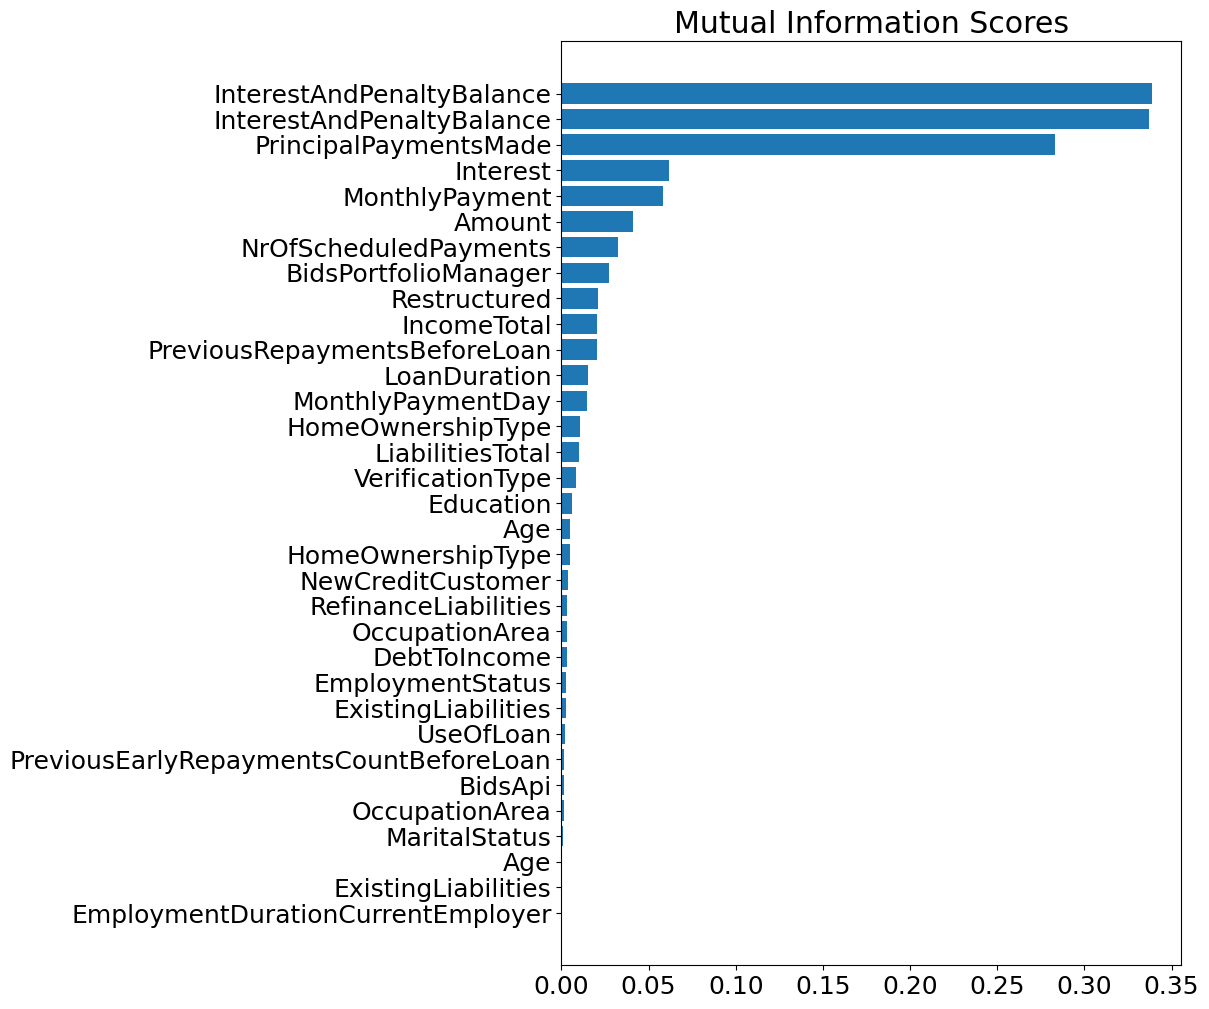

In [106]:
#This code creates a horizontal bar plot of the mutual information scores stored in the mi_scores variable. It sets the figure size to 8x12 inches, sorts the scores in ascending order, assigns bar widths, and sets y-axis ticks and labels. The plot is given the title "Mutual Information Scores".
plt.figure(figsize=(8, 12))
mi_scores = mi_scores.sort_values(ascending=True)
width = np.arange(len(mi_scores))
ticks = list(mi_scores.index)
plt.barh(width, mi_scores)
plt.yticks(width, ticks)
plt.title("Mutual Information Scores")

In [107]:
#This code uses SelectKBest with mutual information classification (mutual_info_classif) as the scoring function to select the top 25 features. It then applies the transformation to X using fit_transform, resulting in a new array X_1_new. The shape of X_1_new is returned and displayed.
X_1=SelectKBest(mutual_info_classif, k=25)
X_1_new=X_1.fit_transform(X, y)
X_1_new.shape

(77341, 25)

In [108]:
#This code retrieves the indices of the selected features from X_1 using get_support(indices=True). It then selects the corresponding column names from the original X dataframe and converts them into a list new_columns_1. Finally, it displays the list of selected column names.
cols=X_1.get_support(indices=True)
new_columns_1=X.iloc[:,cols].columns.tolist()
new_columns_1

['EmploymentStatus',
 'NewCreditCustomer',
 'Amount',
 'InterestAndPenaltyBalance',
 'Age',
 'InterestAndPenaltyBalance',
 'VerificationType',
 'BidsApi',
 'LoanDuration',
 'HomeOwnershipType',
 'OccupationArea',
 'MonthlyPaymentDay',
 'OccupationArea',
 'IncomeTotal',
 'BidsPortfolioManager',
 'Restructured',
 'LiabilitiesTotal',
 'MonthlyPayment',
 'EmploymentDurationCurrentEmployer',
 'PrincipalPaymentsMade',
 'PreviousRepaymentsBeforeLoan',
 'ExistingLiabilities',
 'NrOfScheduledPayments',
 'Interest',
 'DebtToIncome']

# Model Building

# Logistic Regression

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [110]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=20)

In [111]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
model1=log_reg.fit(X_train,y_train)


In [112]:
print("Logistic Rregression training accuracy= ",model1.score(X_train,y_train))
print("Accuracy Score= ",accuracy_score(y_test,model1.predict(X_test)))
print("Confusion Matrix:\n",confusion_matrix(y_test,model1.predict(X_test)))

Logistic Rregression training accuracy=  0.7626436144667331
Accuracy Score=  0.763263371115804
Confusion Matrix:
 [[7778 2713]
 [2780 9932]]


In [113]:
y_pred = model1.predict(X_test)

y_pred = np.array(y_pred>0.5)
print(y_pred.ravel().astype(int))

[1 1 1 ... 1 1 1]


In [114]:
np.array(y_test)

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

In [115]:
def plot_roc_curve(model,X_test,y_test):
    ypred=model.predict(X_test)
    fpr,tpr,threshhold=roc_curve(y_test,ypred)
    plt.plot([0,1],[0,1],color="red",linestyle='--')
    plt.plot(fpr,tpr)
    plt.xlabel("False positive rate",color='red')
    plt.ylabel("True positive rate",color='red')
    plt.title("ROC curve")

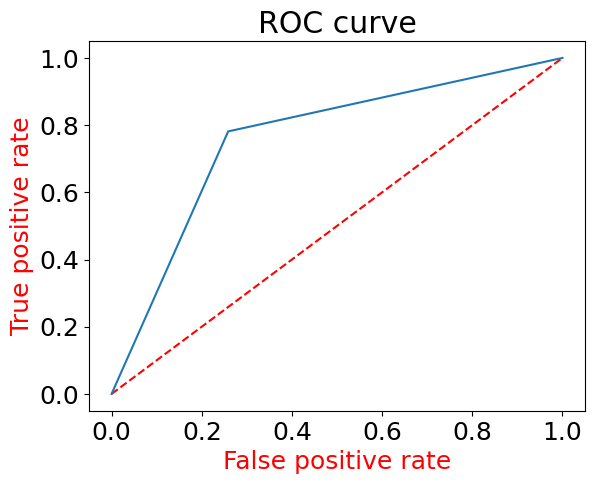

In [116]:
plot_roc_curve(model1,X_test,y_test)

# Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
model2=RandomForestClassifier(n_estimators=10)
model2.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [119]:
print("Random Forest training accuracy= ",model2.score(X_train,y_train))
print("Accuracy Score=",accuracy_score(y_test,model2.predict(X_test)))
print("Confusion Martrix:\n",confusion_matrix(y_test,model2.predict(X_test)))

Random Forest training accuracy=  0.9918910931323655
Accuracy Score= 0.8570874455889325
Confusion Martrix:
 [[ 9013  1478]
 [ 1838 10874]]


In [120]:
y_pred=model2.predict(X_test)
y_pred=np.array(y_pred>0.5)
print(y_pred.ravel().astype(int))

[0 1 1 ... 1 1 1]


In [121]:
np.array(y_test)

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

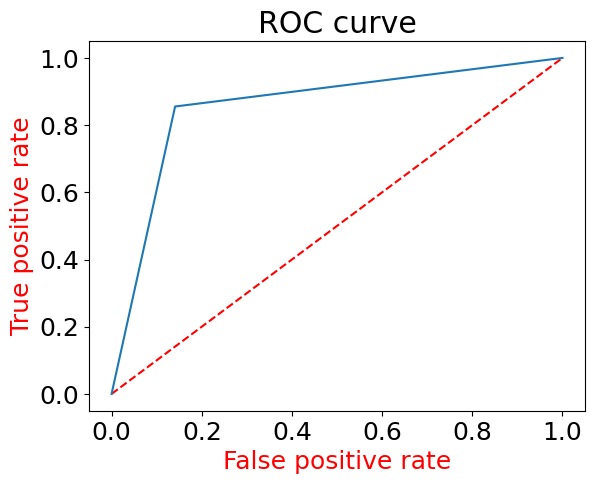

In [122]:
plot_roc_curve(model2,X_test,y_test)

In [125]:
#train test split
from sklearn.model_selection import train_test_split
#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score as CSV

#ML models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2 
from sklearn.model_selection  import cross_val_score as CVS
from sklearn.ensemble import RandomForestRegressor

# Decision Tree Classifier

In [126]:
# Model decision tree regressor observes features of an object and trains a model in the structure of a tree to predict data in the future 
model = DecisionTreeClassifier(max_depth=15, min_samples_leaf=100)

# Fit
model.fit(X_train, y_train)

# Predict
y_predict = model.predict(X_test)

# Score Metrics (This is where it is not complete)
DR_MAE = MAE(y_test, y_predict)
DR_MSE = MSE(y_test, y_predict)
DR_R_2 = R2(y_test, y_predict)
print(f" Mean Absolute Error: {DR_MAE}\n")
print(f" Mean Squared Error: {DR_MSE}\n")
print(f" R^2 Score: {DR_R_2}\n")

 Mean Absolute Error: 0.15528164461492047

 Mean Squared Error: 0.15528164461492047

 R^2 Score: 0.3731297913720165



# Random Forest Classifier

In [127]:
# Random forest regressor is a supervised learning algorithm uses ensemble learning method for regression(classification and refression)
model= RandomForestClassifier(n_estimators=400,max_depth=6,min_samples_leaf=100, n_jobs=4,random_state=101)
# fit
model.fit(X_train,y_train)
#predict
y_predict=model.predict(X_test)
# Score matrics
RFR_MAE = MAE(y_test, y_predict)
RFR_MSE= MSE(y_test, y_predict)
RFR_R_2= R2(y_test, y_predict)
print(f" Mean Absolute Error:{RFR_MAE}\n")
print(f"R^2 Score:{RFR_R_2}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")

 Mean Absolute Error:0.18088178252812137

R^2 Score:0.2697823298330151

 Mean Squared Error: 0.18088178252812137



# Random Forest Classifier

In [128]:
from sklearn.linear_model import Lasso

In [129]:
# Fit Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [130]:
# Evaluate model performance on test set
y_pred = lasso.predict(X_test)

In [131]:
# Model Score
print("Model Score: ", lasso.score(X_test, y_test))
 

Model Score:  0.17899355533709205


In [132]:
# Lasso Coefficient
lasso.coef_

array([-0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  1.32404886e-01,
        0.00000000e+00,  1.34375370e-16,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00])

# Linear Regression

In [133]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)

In [134]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# model evaluation
print('Model Evaluation:')
print('mean_squared_error : ', mean_squared_error(y_test, y_pred_lin))
print('mean_squared_percentage_error : ', mean_absolute_percentage_error(y_test, y_pred_lin))
print('R2_score : ', r2_score(y_test, y_pred_lin))

Model Evaluation:
mean_squared_error :  0.1734124471672061
mean_squared_percentage_error :  791604926974227.2
R2_score :  0.2999359505498801


# KNN REGRESSOR

In [135]:
model = KNeighborsClassifier(n_neighbors=7)

# Fit
model.fit(X_train, y_train)

# Predict
y_predict = model.predict(X_test)

# Score Matrics
KNR_MAE = MAE(y_test, y_predict)
KNR_MSE = MSE(y_test, y_predict)
KNR_R_2 = R2(y_test, y_predict)
print(f" Mean Absolute Error: {KNR_MAE}\n")
print(f" Mean Squared Error: {KNR_MSE}\n")
print(f" R^2 Score: {KNR_R_2}\n")


 Mean Absolute Error: 0.22527259406111277

 Mean Squared Error: 0.22527259406111277

 R^2 Score: 0.09057713558188474



# LINEAR REGRESSION

In [136]:
# Model
import warnings
warnings.filterwarnings("ignore")
model = LinearRegression(normalize=True)

# Fit
model.fit(X_train, y_train)

# Predict
y_predict = model.predict(X_test)

# Score Metrics for Regression:
LR_MAE = MAE(y_test, y_predict)
LR_MSE = MSE(y_test, y_predict)
LR_R_2 = R2(y_test, y_predict)
print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Squared Mean Squared Error: {np.sqrt(LR_MSE)}\n")
print(f" R^2 Score: {LR_R_2}\n")


 Mean Absolute Error: 0.35658970167507165

 Squared Mean Squared Error: 0.4164276237603858

 R^2 Score: 0.2999378936997179



# LASSO REGRESSION

In [137]:
#model
import warnings
warnings.filterwarnings("ignore")
model= Lasso(alpha=0.5, normalize=True)
#fit
model.fit(X_train,y_train)
#predict
y_predict = model.predict(X_test)

#Score metrics for regression:
LS_MAE = MAE(y_test,y_predict)
LS_MSE= MSE(y_test, y_predict)
LS_R_2 =R2(y_test, y_predict)
print(f" Mean Absolute Error: {LS_MAE}\n")
print(f" Mean Squared Error: {LS_MSE}n")
print(f" R^2 Score:{LS_R_2}\n")



 Mean Absolute Error: 0.4947205094827688

 Mean Squared Error: 0.2477626214270769n
 R^2 Score:-0.00021484554320649885



# Decision tree regressor

In [138]:
# Model
model = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

# Fit
model.fit(X_train, y_train)

# Predict
y_predict = model.predict(X_test)

# Score Metrics (This is where it is not complete)
DR_MAE = MAE(y_test, y_predict)
DR_MSE = MSE(y_test, y_predict)
DR_R_2 = R2(y_test, y_predict)
print(f" Mean Absolute Error: {DR_MAE}\n")
print(f" Mean Squared Error: {DR_MSE}\n")
print(f" R^2 Score: {DR_R_2}\n")


 Mean Absolute Error: 0.21318269040578575

 Mean Squared Error: 0.11126663160979447

 R^2 Score: 0.5508178912998013



# RANDOM FOREST REGRESSOR

In [139]:
# Model

model = RandomForestRegressor(n_estimators=400, max_depth=6, min_samples_leaf=100, n_jobs=4, random_state=101)

# Fit
model.fit(X_train, y_train)

# Predict
y_predict = model.predict(X_test)

# Score Matrics
RFR_MAE = MAE(y_test, y_predict)
RFR_MSE = MSE(y_test, y_predict)
RFR_R_2 = R2(y_test, y_predict)
print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")

 Mean Absolute Error: 0.24545929424028354

 Mean Squared Error: 0.12128883753453207

 R^2 Score: 0.5103583615560701



# MODEL EVALUATION OF RANDOM FOREST REGRESSOR


In [140]:
from sklearn.linear_model import Lasso

In [141]:
# Fit Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [142]:

# Evaluate model performance on test set
y_pred = lasso.predict(X_test)

In [143]:
# Model Score
print("Model Score: ", lasso.score(X_test, y_test))

Model Score:  0.17899355533709205


In [144]:
# Lasso Coefficient
lasso.coef_

array([-0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  1.32404886e-01,
        0.00000000e+00,  1.34375370e-16,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00])

# MODEL EVALUATION OF LINEAR REGRESSION

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [146]:
#Import and initialize Lasso Regression model
alpha = 0.1  # Adjust the regularization strength (alpha) as per your requirements
lasso_model = Lasso(alpha=alpha)

In [147]:
#Train the model
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [148]:
#Make predictions
y_pred = lasso_model.predict(X_test)

In [149]:
#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
y_pred_lr=lasso_model.predict(X_test)

In [150]:
print('Mean Squared Error:', mse)
print('mean_squared_percentage_error : ', mean_absolute_percentage_error(y_test, y_pred_lr))
print('R-squared:', r2)

Mean Squared Error: 0.20337101558189127
mean_squared_percentage_error :  988912262988700.5
R-squared: 0.17899355533709205


# PIPELINES

# Machine learning pipelines for classification and regression

In [152]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report



# Classification report for  ML pipelines

In [155]:
# Create a machine learning pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
pipeline = Pipeline([
    ('scaler', StandardScaler()),         # Standardize features
    ('feature_selector', SelectKBest()),  # Select top k features
    ('classifier', RandomForestClassifier())  # Random Forest classifier
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Evaluate the model
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)



Mean Squared Error: 0.14144417867994052
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      6877
           1       0.87      0.88      0.87      8592

    accuracy                           0.86     15469
   macro avg       0.86      0.86      0.86     15469
weighted avg       0.86      0.86      0.86     15469



In [154]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a machine learning pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),         # Standardize features
    ('feature_selector', SelectKBest()),  # Select top k features
    ('regressor', LinearRegression())      # Linear regression model
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.172598274260294


# Mean Squared Error for  y_ test And y_pred is 0.17

In [160]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load your Bandora peer-to-peer lending regression dataset
# Replace 'data.csv' with the actual path to your dataset
data = pd.read_csv("C:/Users/hp/Downloads/Bondora_raw (1).zip")

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a machine learning pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),             # Standardize features
    ('feature_selector', SelectKBest()),      # Select top k features
    ('regressor', RandomForestRegressor())    # Random Forest regressor
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.10241354721140761


# Classification pipeline for ensemble learning
# Ensemble learning is an approach in which two or more models are fitted to the same data, and the predictions of each model are combined.

In [164]:
pip install imblearn

     -------------------------------------- 235.6/235.6 kB 1.2 MB/s eta 0:00:00
     -------------------------------------- 302.0/302.0 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


# Importing the libraries

In [167]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import StandardScaler, scale, MinMaxScaler
from sklearn.decomposition import PCA
over = RandomOverSampler(random_state=0)
smote = SMOTE()

stdscaler = StandardScaler()
scaler = MinMaxScaler()

pca = PCA(n_components=2)

In [169]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### Quadratic discriminant -analysis is quite similar to Linear discriminant analysis except we relaxed the assumption that the mean and covariance of all the classes were equal.

In [175]:
qda = QuadraticDiscriminantAnalysis()

rf = RandomForestClassifier(random_state=0)

In [176]:
estimators = [('QDA', qda), ('RandomForest', rf)]
final_estimator = GradientBoostingClassifier()
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [177]:
model_ensemble = Pipeline([
    ('stdscaler', stdscaler),
    ('pca', pca),
    ('classifier', clf)
])

# Test Acuuracy for model prediction

In [187]:
model_ensemble.fit(X_train, y_train)
pred = model_ensemble.predict(X_test)
print('test accuracy = ', round(accuracy_score(y_test, pred)*100, 2), '%')

test accuracy =  58.31 %


# CLASSIFICATION REPORT

In [185]:
print(classification_report(y_test, pred, digits=3))

              precision    recall  f1-score   support

           0      0.548     0.368     0.441      6877
           1      0.600     0.757     0.669      8592

    accuracy                          0.584     15469
   macro avg      0.574     0.563     0.555     15469
weighted avg      0.577     0.584     0.568     15469



## CONCLUSION

#### Precision is - Precision is a measure of how close a predicted value is to the actual value. In machine learning, precision is a measure of how accurate a classifier is. A high precision means that when the classifier predicts an instance as positive, it is very likely to be positive.

### Recall - The recall is calculated as the ratio between the numbers of Positive samples correctly classified as Positive to the total number of Positive samples. The recall measures the model's ability to detect positive samples. 


### F1 score - F1 score is a machine learning evaluation metric that combines precision and recall scores.